# Video:

https://drive.google.com/file/d/1HOtOW0w7Ss3ZZxvAiOSO9P9bEvjcrSEv/view?usp=sharing

# COGS 108 - The Rise of Covid and Decline of Mental Health

# Names

- Iris Choi
- Sophia Kim
- Daniel Lee
- Eun Lee
- Suebeen Noh

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

---
# Overview

The recent pandemic of COVID-19 has caused an innumerable amount of people to have lost their loved ones, jobs, education, opportunities and interactions. In addition, these sudden and drastic losses have come within a relatively short time-span with COVID-19 having caused global shutdowns for only about 2 years. With this information in mind, it wouldn’t be difficult to fathom the negative impact the virus has had on the mental health of the majority of the global population in the United States. The purpose of this study is to answer whether or not there is a relationship between the recent pandemic and increase in mental illnesses using self-reported/diagnosed anxiety and depression as our benchmarks.

---
# Research Question
### To what extent has the rise of Covid case rates caused an increase of mental illness in the United States? 
We will be measuring depression on an account of 2 types of depression: major and minor. Minor depression is known as an informal version of depression, where patients are usually prescribed anti-depressants as medication. Major depression is otherwise known as clinical depression, in which patients are usually prescribed medication and recommended clinical psychology or therapy. The measurements will take place for percentage of 18-29 year olds who were said to have undergone one of these major or minor treatements(2020-2022 monthly).

---
# Background and Prior Work
**PRIOR WORK**: A study that supports our proposed correlation comes from a 2020 CDC (1) article, where “U.S. adults reported considerably elevated adverse mental health conditions associated with COVID-19.” Specifically younger adults, ethnic minorities, and essential workers reported having worse mental health outcomes, marked by a rise in substance use and suicidal thoughts. The relation between the pandemic and increase in mental illness is thought to be associated with stay-at-home orders and physical distancing rules. 
These articles both support a correlation between the recent COVID pandemic and the decline of mental health, which have come in the forms of self-reported symptoms of anxiety/depression, substance abuse, and suicidal thoughts. A significant factor to consider when taking into account the rising statistics of mental illness during the period of COVID-19 is that a large amount of the data reported by these studies were communities that have been directly affected by the pandemic. This provides the basis for a relationship between the rise of mental illness due to the countermeasures taken due to the virus. These precautions have resulted in the impacted communities of essential workers, those who have experienced home/job loss, and young adults who have lost education and job opportunities. 
- It is important to note in these articles, that there is no direct correlation mentioned in regards to declining mental health and the rise of COVID-19 cases, but more-so the decline of mental health during the time progression of COVID-19 and pandemic countermeasures.
- It is important to note that these articles do not specify if they are global or state-focused

**References :**
 1) https://www.cdc.gov/mmwr/volumes/69/wr/mm6932a1.htm

 2) https://www.kff.org/coronavirus-covid-19/issue-brief/the-implications-of-covid-19-for-mental-health-and-substance-use/


---
# Hypothesis

We hypothesize that there is a positive relationship between an increase in covid rates and the rise of mental illnesses. We’ve come to this inference not only due to past studies, but also because of the wide-spread impact isolation and distancing has had on the public. We would like to indicate that COVID-19 itself is not associated with a decline in mental health, but more so the precautionary actions taken as a result of the pandemic that weakened the public’s emotional welfare. 

---
# Dataset(s)

The ideal datasets to answer this research question would be ones that clearly encompass the factors of covid-19 cases and mental illness reports. We would need data regarding covid-cases from 2019-2021 to see its changes and trends. In addition, we would need to see data of mental illness rates, from a wide-spectrum over the same time-course to see if there is a correlation between the two factors. 
We plan to store and organize our datasets by first creating tidy data. Each dataset would have columns clearly labeled with each variable and rows containing each observation. By doing so, we would aim to create a more consistent data structure. In addition, we would eliminate all unneeded variables from each dataset and if needed, combine multiple different datasets (e.g. we may want to merge three different datasets for mental health according to time-frame). Ideally, from each of our organized dataset, we would be able to create clear data visualizations to analyze and draw conclusions from. 
 
# Dataset Related to Covid Rates:
Dataset Name: Data Table for Daily Case Trends - The United States

Link to the dataset: https://covid.cdc.gov/covid-data-tracker/#trends_dailycases

Number of observations: 1,558 observations 

This CDC dataset represents the numbers of new confirmed cases for each month to identify the times where Covid-rates spiked. By having such data, we are able to compare with datasets related to mental health to determine if there was a correlation between covid case spikes and a rise in mental illnesses. 
 
# Dataset related to Mental health care 
Dataset Name: Mental Health Care 

Link to the dataset: https://www.cdc.gov/nchs/covid19/pulse/mental-health-care.htm

Number of observations: 139,920 observations

This mental-health-related dataset represents the results from self-reported survey/questionnaire for the percentage of individuals who need mental health care based on anxiety and depressive symptoms.This data would provide information for changes in people’s perceived mental health related symptoms throughout the months of 2020-2022. From the dataset, we used data regarding adults in four different conditions:

1) Took prescription medication for mental illness, 

2) Received counseling or therapy from a health professional 

3) Needed counseling or therapy but did not get it, and 

4) Took prescription medication for mental illness and/or received counseling or therapy from a health professional. 

We used these to create variables that represent the overall mental health status of the U.S. adult population. 


---
# Setup

In [49]:
import pandas as pd 
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [50]:
#read in datasets that we want to implement 
prescribed_depression = pd.read_csv('https://data.cdc.gov/api/views/yni7-er2q/rows.csv?accessType=DOWNLOAD')                                                                

In [51]:
covid_cases = pd.read_csv('https://raw.githubusercontent.com/daywon412/MyFirstPullRequest/master/data_table_for_daily_case_trends__the_united_states%20-%20data_table_for_daily_case_trends__the_united_states.csv') 

---
# Data Cleaning

Fortunately, the datasets collected were all in csv files, which allowed the data gathering process to be relatively seamless.
The dataset that contained data on covid cases were called ***'covid_cases'*** while the dataset containing data on depression were named ***'prescribed_depression'***.

In order to begin the process of changing the raw, unclean data to tidy data, we looked at the datasets.

In [52]:
covid_cases.head()

,State,Date,New Cases,7-Day Moving Avg,Historic Cases
0,United States,Mar 11 2022,38482,34805,0
1,United States,Mar 10 2022,42566,35269,316
2,United States,Mar 9 2022,48868,36781,930
3,United States,Mar 8 2022,31658,37646,972
4,United States,Mar 7 2022,60325,39210,2211


In [53]:
prescribed_depression.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


---
# Tidying up the covid_cases dataset

### Combining Covid Patient Columns

After seeing that the covid_cases dataset contained multiple columns that all described a person having covid, we added up all of these columns into one column called covid_patients.
All cases of NaNs were replaces with 0 in order to make the process more seamless. We also dropped any columns that were not relevant for our hypthesis.

In [54]:
#tidying datasets 
#dropping irrelevant columns 
covid_cases = covid_cases.drop(['7-Day Moving Avg', 'Historic Cases', 'State'], axis = 1)

covid_cases.head()

,Date,New Cases
0,Mar 11 2022,38482
1,Mar 10 2022,42566
2,Mar 9 2022,48868
3,Mar 8 2022,31658
4,Mar 7 2022,60325


### Organizing the Date Column

Now we need to organize covid patients by the month they were diagnosed. In order to do this we used the loc() method to find all rows that contained a specfic month.
After repeating this process for all months available, we created a new dataset containing a specific month and the total covid patients diagnosed in that certain month.

In [55]:
#Organizing the data so that we have the number of covid patients per month from our data
#checks through data to see ocurrences of month and year and adds together patients from those occurences 

#creating dictionary to hold the month and patient values we want for our data
months = { 'Jan 20': '', 'Feb 20': '', 'Mar 20': '', 'Apr 20': '', 'May 20': '', 'Jun 20':'', 
          'Jul 20':'', 'Aug 20':'', 'Sep 20':'', 'Oct 20':'', 'Nov 20':'', 'Dec 20':'',
          'Jan 21':'', 'Feb 21':'', 'Mar 21':'', 'Apr 21':'', 'May 21':'', 'Jun 21':'', 
          'Jul 21':'', 'Aug 21':'', 'Sep 21':'', 'Oct 21':'', 'Nov 21':'', 'Dec 21':'',
          'Jan 22':'', 'Feb 22':'', 'Mar 22':''
    }

#list of months to go through for our dataset
covid_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
               'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
               'Jan', 'Feb', 'Mar']

# of years to iterate through for the time range we are considering
year = ['2020', '2021', '2022']

#creating empty dictionary to represent our dataframe for our new data
covid_data = { 'Months': [], 'Cases': []}

#for each month in our dictionary, we loop through our data where we check for a specific year and month
#and then sum together all cases together that are indicated for the month and year we're checking for
#i keeps track of the number of months in our dictionary, if we hit 12, or december we increment j by 1 to 
#move to the next year in our year list
i = 0
j = 0
for key in months:
    months[key] = covid_cases.loc[covid_cases['Date'].str.contains(covid_months[i], case = True) & covid_cases['Date'].str.contains(year[j], case = True)]['New Cases'].sum()
    i+=1
    if(i % 12 == 0):
        j +=1

for key, value in months.items():
    covid_data['Months'].append(key)
    covid_data['Cases'].append(value)

#converting dictionary into dataframe 
covid_cases = pd.DataFrame(covid_data)

covid_cases

,Months,Cases
0,Jan 20,4
1,Feb 20,66
2,Mar 20,212444
3,Apr 20,876661
4,May 20,744028
5,Jun 20,860790
6,Jul 20,1938397
7,Aug 20,1476774
8,Sep 20,1219681
9,Oct 20,1935181


---
# Tidying up the prescribed_depression dataset

In [56]:
#dropping irrelevant columns/variables we aren't considering
#depMajor = major depression percentage values for young adults within the age of 18-29
#depMinor1 = minor depression percentage of 18-29 year olds that received counseling or therapy
#depMinor2 = minor depression percentage of 18-29 year olds that weren't able to receive counseling or therapy
#depMajMin = combined percentage of 18-29 year olds who experienced both major and minor depression

depMinor = prescribed_depression.loc[prescribed_depression['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks'].rename(columns = {'Time Period Label': 'Date'})
depMinor = depMinor.loc[depMinor['Subgroup'] == '18 - 29 years']

depMajor1 = prescribed_depression.loc[prescribed_depression['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks'].rename(columns = {'Time Period Label': 'Date'})
depMajor1 = depMajor1.loc[depMajor1['Subgroup'] == '18 - 29 years']

depMajor2 = prescribed_depression.loc[prescribed_depression['Indicator'] == 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks'].rename(columns = {'Time Period Label': 'Date'})
depMajor2 = depMajor2.loc[depMajor2['Subgroup'] == '18 - 29 years']

depMajMin = prescribed_depression.loc[prescribed_depression['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks'].rename(columns = {'Time Period Label': 'Date'})
depMajMin = depMajMin.loc[depMajMin['Subgroup'] == '18 - 29 years']

In [57]:
#dropping irrelevant columns/variables we aren't considering
depMinor = depMinor.drop(['Group', 'State', 'Phase', 'Time Period', 'Time Period Start Date', 'Time Period End Date', 'Suppression Flag', 'Quartile Range', 'LowCI', 'HighCI', 'Confidence Interval'], axis = 1)
depMajor1 = depMajor1.drop(['Group', 'State', 'Phase', 'Time Period', 'Time Period Start Date', 'Time Period End Date', 'Suppression Flag', 'Quartile Range', 'LowCI', 'HighCI', 'Confidence Interval'], axis = 1)
depMajor2 = depMajor2.drop(['Group', 'State', 'Phase', 'Time Period', 'Time Period Start Date', 'Time Period End Date', 'Suppression Flag', 'Quartile Range', 'LowCI', 'HighCI', 'Confidence Interval'], axis = 1)
depMajMin = depMajMin.drop(['Group', 'State', 'Phase', 'Time Period', 'Time Period Start Date', 'Time Period End Date', 'Suppression Flag', 'Quartile Range', 'LowCI', 'HighCI', 'Confidence Interval'], axis = 1)

In [58]:
depMinor = depMinor.dropna()
depMajor1 = depMajor1.dropna()
depMajor2 = depMajor2.dropna()
depMajMin = depMajMin.dropna()

In [59]:
depMinor.head()

,Indicator,Subgroup,Date,Value
1,Took Prescription Medication for Mental Health...,18 - 29 years,"Aug 19 - Aug 31, 2020",18.7
289,Took Prescription Medication for Mental Health...,18 - 29 years,"Sep 2 - Sep 14, 2020",18.4
577,Took Prescription Medication for Mental Health...,18 - 29 years,"Sep 16 - Sep 28, 2020",19.1
865,Took Prescription Medication for Mental Health...,18 - 29 years,"Sep 30 - Oct 12, 2020",17.5
1153,Took Prescription Medication for Mental Health...,18 - 29 years,"Oct 14 - Oct 26, 2020",19.4


In [60]:
depMajor1.head()

,Indicator,Subgroup,Date,Value
73,"Received Counseling or Therapy, Last 4 Weeks",18 - 29 years,"Aug 19 - Aug 31, 2020",12.2
361,"Received Counseling or Therapy, Last 4 Weeks",18 - 29 years,"Sep 2 - Sep 14, 2020",13.0
649,"Received Counseling or Therapy, Last 4 Weeks",18 - 29 years,"Sep 16 - Sep 28, 2020",12.1
937,"Received Counseling or Therapy, Last 4 Weeks",18 - 29 years,"Sep 30 - Oct 12, 2020",12.5
1225,"Received Counseling or Therapy, Last 4 Weeks",18 - 29 years,"Oct 14 - Oct 26, 2020",14.5


In [61]:
depMajor2.head()

,Indicator,Subgroup,Date,Value
217,Needed Counseling or Therapy But Did Not Get I...,18 - 29 years,"Aug 19 - Aug 31, 2020",15.6
505,Needed Counseling or Therapy But Did Not Get I...,18 - 29 years,"Sep 2 - Sep 14, 2020",15.9
793,Needed Counseling or Therapy But Did Not Get I...,18 - 29 years,"Sep 16 - Sep 28, 2020",18.5
1081,Needed Counseling or Therapy But Did Not Get I...,18 - 29 years,"Sep 30 - Oct 12, 2020",16.6
1369,Needed Counseling or Therapy But Did Not Get I...,18 - 29 years,"Oct 14 - Oct 26, 2020",18.5


In [62]:
depMajMin.head()

,Indicator,Subgroup,Date,Value
145,Took Prescription Medication for Mental Health...,18 - 29 years,"Aug 19 - Aug 31, 2020",23.3
433,Took Prescription Medication for Mental Health...,18 - 29 years,"Sep 2 - Sep 14, 2020",23.1
721,Took Prescription Medication for Mental Health...,18 - 29 years,"Sep 16 - Sep 28, 2020",23.8
1009,Took Prescription Medication for Mental Health...,18 - 29 years,"Sep 30 - Oct 12, 2020",22.2
1297,Took Prescription Medication for Mental Health...,18 - 29 years,"Oct 14 - Oct 26, 2020",24.7


For our data regarding major and minor depression, we are taking 4 different subsections from our dataset. 2 representing major depression, 1 representing minor, and 1 representing a combination of major and minor depression. Since they are all from the same dataset, all percentages for each subsection are separated by the same date format, thus we decided to implement a function that we can apply to all our 4 individual datasets to return a dataframe with the isolated variables we desire. 

In [63]:
#creating a function to create the dataframes with only the columns we desire to oobserve
def create_dataframe(depression):
    
    #creating a months and percentage dictionary for all months that are displayed within our dataset
    months = {'Aug 20':'', 'Sep 20':'', 'Oct 20':'', 'Nov 20':'', 'Dec 20':'',
          'Jan 21':'', 'Feb 21':'', 'Mar 21':'', 'Apr 21':'', 'May 21':'', 'Jun 21':'', 
          'Jul 21':'', 'Aug 21':'', 'Sep 21':'', 'Oct 21':'', 'Dec 21':'',
          'Jan 22':'', 'Feb 22':''
    }
    
    #list of months to go through for our dataset
    dep_months = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec',
               'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Dec',
               'Jan', 'Feb']

    #years that we are desiring to iterate through for our covid time-range
    year = ['2020', '2021', '2022']

    #creating empty dictionary to represent our dataframe for our new data
    dep_data = { 'Months': [], 'Percentage': []}
    

    #for each month in our dictionary, we loop through our data where we check for a specific year and month
    #and then sum together all cases together that are indicated for the month and year we're checking for
    #i keeps track of the number of months in our dictionary, if we hit december in our list we increment j by 1 to 
    #move to the next year in our year list
    i = 0
    j = 0
    for key in months:
        months[key] = depression.loc[depression['Date'].str.contains(dep_months[i], case = True) & depression['Date'].str.contains(year[j], case = True)]['Value'].mean()
        if(dep_months[i] == 'Dec'):
            j +=1
        i+=1

    #adding all our months as the key for our new dictionary and all
    #perentage values as our value for our new dictionary
    for key, value in months.items():
        dep_data['Months'].append(key)
        dep_data['Percentage'].append(value)
        
    #returns the dictionary we created 
    return dep_data

In [64]:
#Organizing the data so that we have the number of prescribed patients per month by age from our data
#checks through data to see ocurrences of month and year and adds together patients from those occurences 

#using our function to create our dataset with desired isolated columns for major depression
depMin_dataset = pd.DataFrame(create_dataframe(depMinor))
depMin_dataset

,Months,Percentage
0,Aug 20,18.700000
1,Sep 20,18.333333
2,Oct 20,19.300000
3,Nov 20,20.300000
4,Dec 20,19.950000
5,Jan 21,21.200000
6,Feb 21,20.766667
7,Mar 21,20.666667
8,Apr 21,21.400000
9,May 21,21.200000


In [65]:
depMaj1_dataset =  pd.DataFrame(create_dataframe(depMajor1))
depMaj1_dataset

,Months,Percentage
0,Aug 20,12.200000
1,Sep 20,12.533333
2,Oct 20,13.933333
3,Nov 20,14.300000
4,Dec 20,12.900000
5,Jan 21,14.700000
6,Feb 21,15.333333
7,Mar 21,15.666667
8,Apr 21,16.900000
9,May 21,16.700000


In [66]:
#using our function to create our dataset with desired isolated columns for 2nd minor depression
#dataset
depMaj2_dataset = pd.DataFrame(create_dataframe(depMajor2))
depMaj2_dataset

,Months,Percentage
0,Aug 20,15.600000
1,Sep 20,17.000000
2,Oct 20,18.900000
3,Nov 20,20.700000
4,Dec 20,21.950000
5,Jan 21,21.066667
6,Feb 21,22.366667
7,Mar 21,21.133333
8,Apr 21,18.800000
9,May 21,18.733333


In [67]:
#using our function to create our dataset with desired isolated columns for our combined
#major and minor datasets
depMajMin_dataset = pd.DataFrame(create_dataframe(depMajMin))
depMajMin_dataset

,Months,Percentage
0,Aug 20,23.300000
1,Sep 20,23.033333
2,Oct 20,24.566667
3,Nov 20,25.700000
4,Dec 20,24.850000
5,Jan 21,26.933333
6,Feb 21,26.900000
7,Mar 21,26.700000
8,Apr 21,27.900000
9,May 21,27.366667


---
# Data Analysis & Results (EDA)

---
## Visualizing Covid Cases

After looking at the data we realized that some months are missing in the depressive disorder datasets. In order to properly compare covid cases to these datasets, we aligned the uneven datasets by removing these dates in the covid cases dataset.
>TLDR: we will be removing Jan 2020 ~ July 2020, November 2021, and Mar 2022

In [68]:
covid_cases = covid_cases.drop(index = [0,1,2,3,4,5,6,22,26])
covid_cases

,Months,Cases
7,Aug 20,1476774
8,Sep 20,1219681
9,Oct 20,1935181
10,Nov 20,4432799
11,Dec 20,6370751
12,Jan 21,6086303
13,Feb 21,2342674
14,Mar 21,1796413
15,Apr 21,1845366
16,May 21,898775


In order to study the relationship between Covid-19 and major/minor depression, it is important to see when Covid-19 was most prevelant. This allows us to plot a potential correlation between a rise in Covid case #'s and a rise in percentage of young adults who were experiencing minor or major depressive symptoms.

<function matplotlib.pyplot.show(close=None, block=None)>

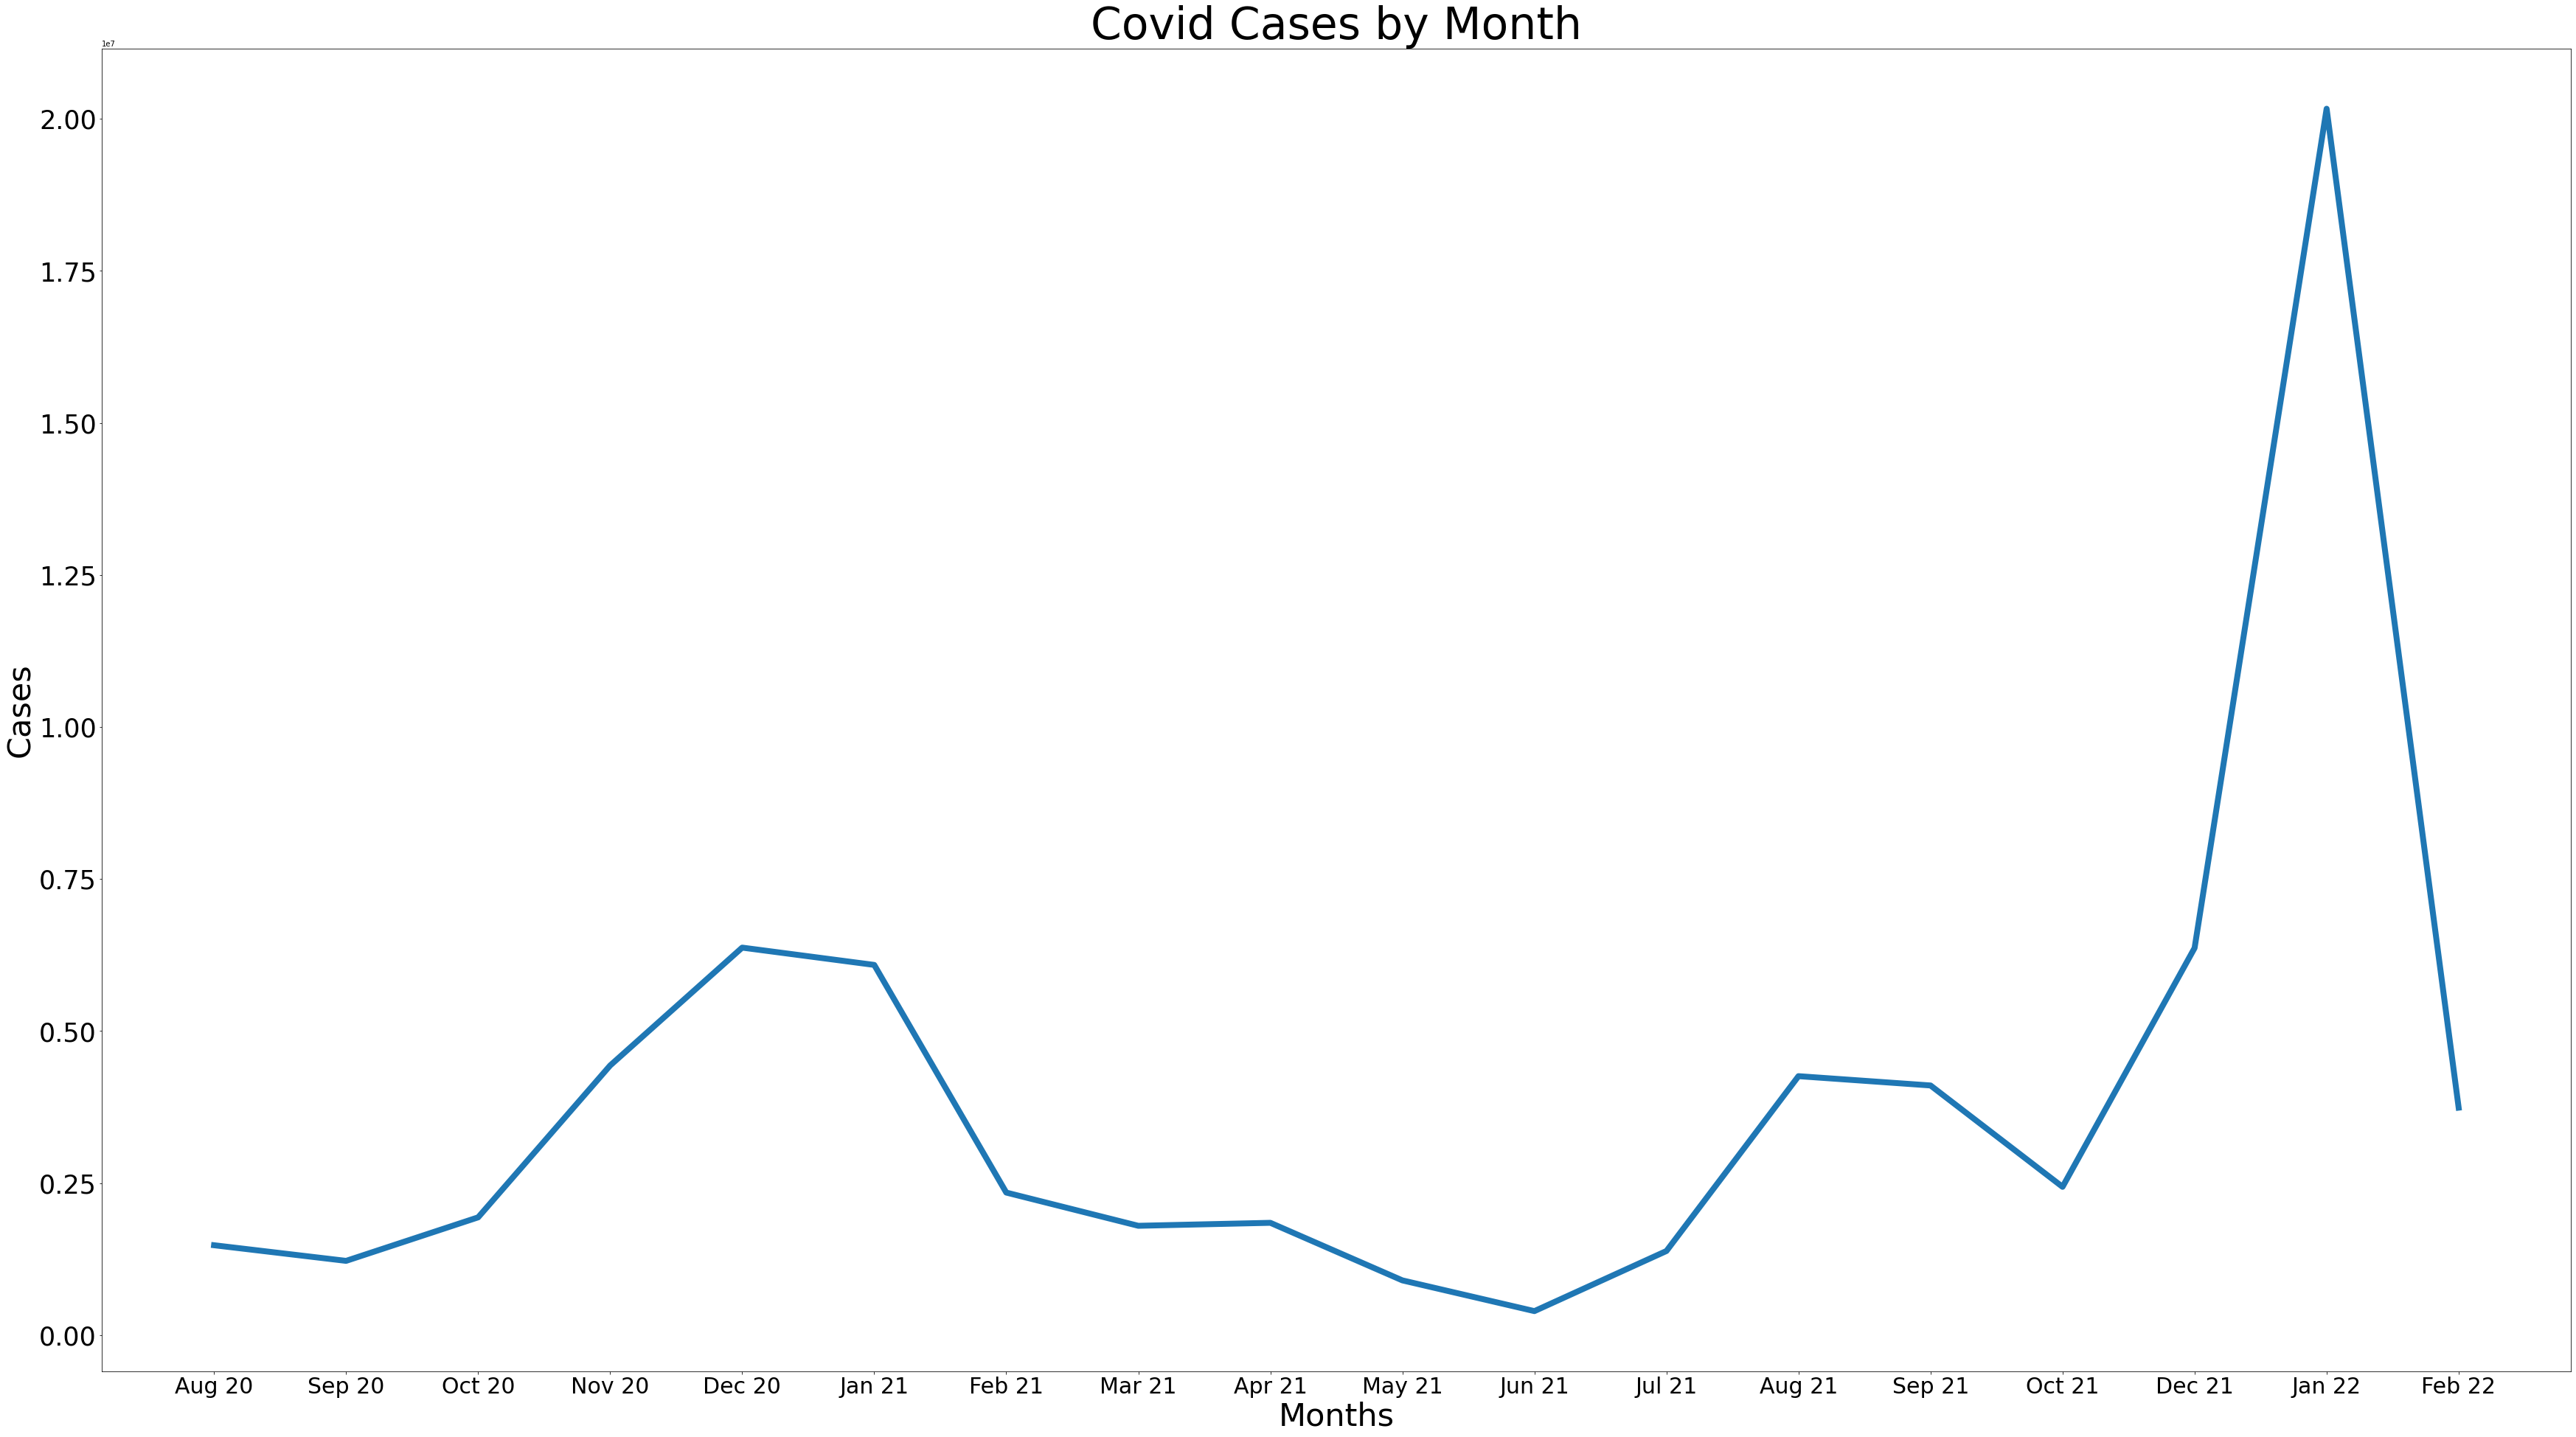

In [69]:
plt.figure(figsize = (60,33))
sns.lineplot(x='Months', y = 'Cases', data = covid_cases, linewidth = 8)
plt.title('Covid Cases by Month', size = 60)
plt.xlabel('Months', size = 43)
plt.ylabel('Cases', size = 43)
plt.xticks(size = 30)
plt.yticks(size = 35)
plt.show

This lineplot shows that the peaks of Covid were at around December 2020, September 2021, and January 2022. 
The largest peak occurred on January 2022, followed by an equally sharp decrease on Feburary 2022.
It is important to take into account how major/minor depressive disorders usually take longer than a month before an individual can recover.
Therefore a decrease in Covid cases would not necessarily correlate with a decrease in major/minor depressive disorders.

<AxesSubplot:ylabel='Cases'>

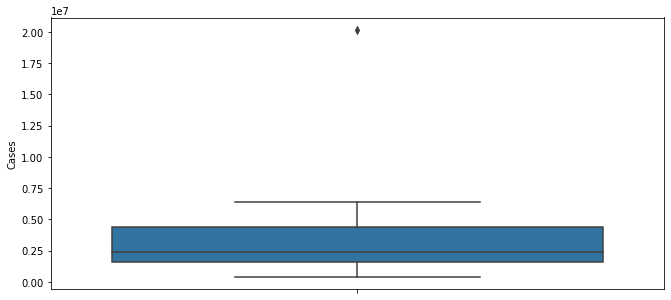

In [70]:
plt.figure(figsize = (11,5))
sns.boxplot(y = 'Cases', data = covid_cases)

Another way to look for outliers in the dataset would be graphing a box plot like above. The box plot shows
that the median is around 2.5 e^6 cases with the 75 percentile being around 5.0 e^6 cases and the 25 percentile 
being around 1.0 e^6 cases.
The almost comical visualization of the box plot shows just how big of an outlier Janurary 2022 was and 
thus this date would be most interesting to see if mental illness rate were affected at all.

In [71]:
covid_cases.describe()

,Cases
count,1.800000e+01
mean,3.958165e+06
std,4.470348e+06
min,3.933300e+05
25%,1.556684e+06
50%,2.389782e+06
75%,4.388828e+06
max,2.016580e+07


The describe function also supports this claim, with the 25th percentile having 1.556684e+05 covid cases, 
the 50th percentile having 2.389782e+06 covid cases, and the 75th percentile having 4.388828e+06 covid cases.

Based off this information, any data above the 75th or below the 25th percentile will be considered an outlier.
Thus, Janurary 2022 will be considered an outlier while months above the 50th percentile like December 2020, Janurary 2021, August 2021, and September 2021 
will be still considered above average and potentially important data points.

<BarContainer object of 18 artists>

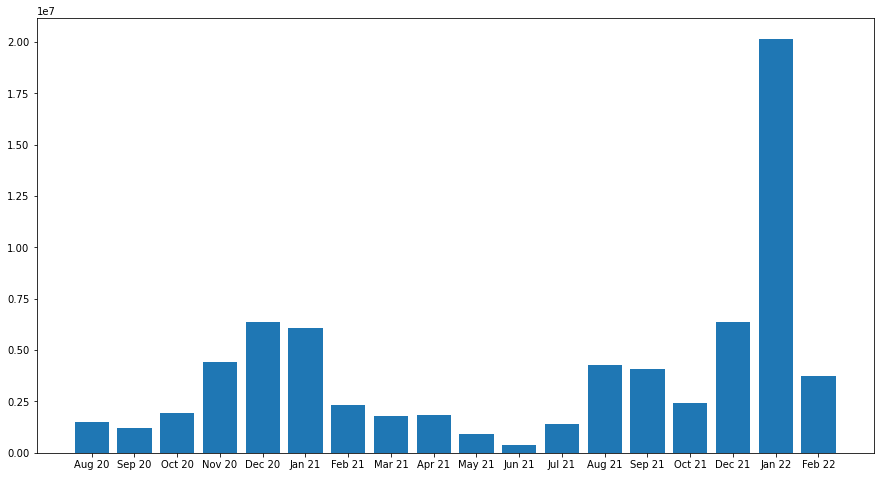

In [72]:
plt.figure(figsize = (15,8))
plt.bar(covid_cases['Months'], covid_cases['Cases'])

The bar plot shows a clearer view of each specific month's covid cases. Looking at the graph
we see that for the most part there is not really an obvious distribution like Gaussian for example, 
and instead shows a generally random, continuous function. This shows us that the best course 
of action in analyzing this type of data would be through line plots, as line plots are most
effective at showing trends over a long period time.

Data points like December 2020, January 2021, December 2021, and January 2022 are considered
outliers using the boxplot and are important dates to consider for the future when trying to 
find a relationship between covid cases and mental illness. This also may show a potential annual
pattern as both January and December were repeated as being outliers of covid cases for the last two consecutive years.

---
## Visualizing all the Mental Illness Datasets

Since the depressive disorders were divided into 4 different variables, we decided to visualize
the mental illness datasets by creating four separate graphs for each of the variables. In
order to compare to the covid_cases dataset, we made line plots to see if the trends seen in
the covid_cases dataset was also seen in the mental illness datasets as well.

<function matplotlib.pyplot.show(close=None, block=None)>

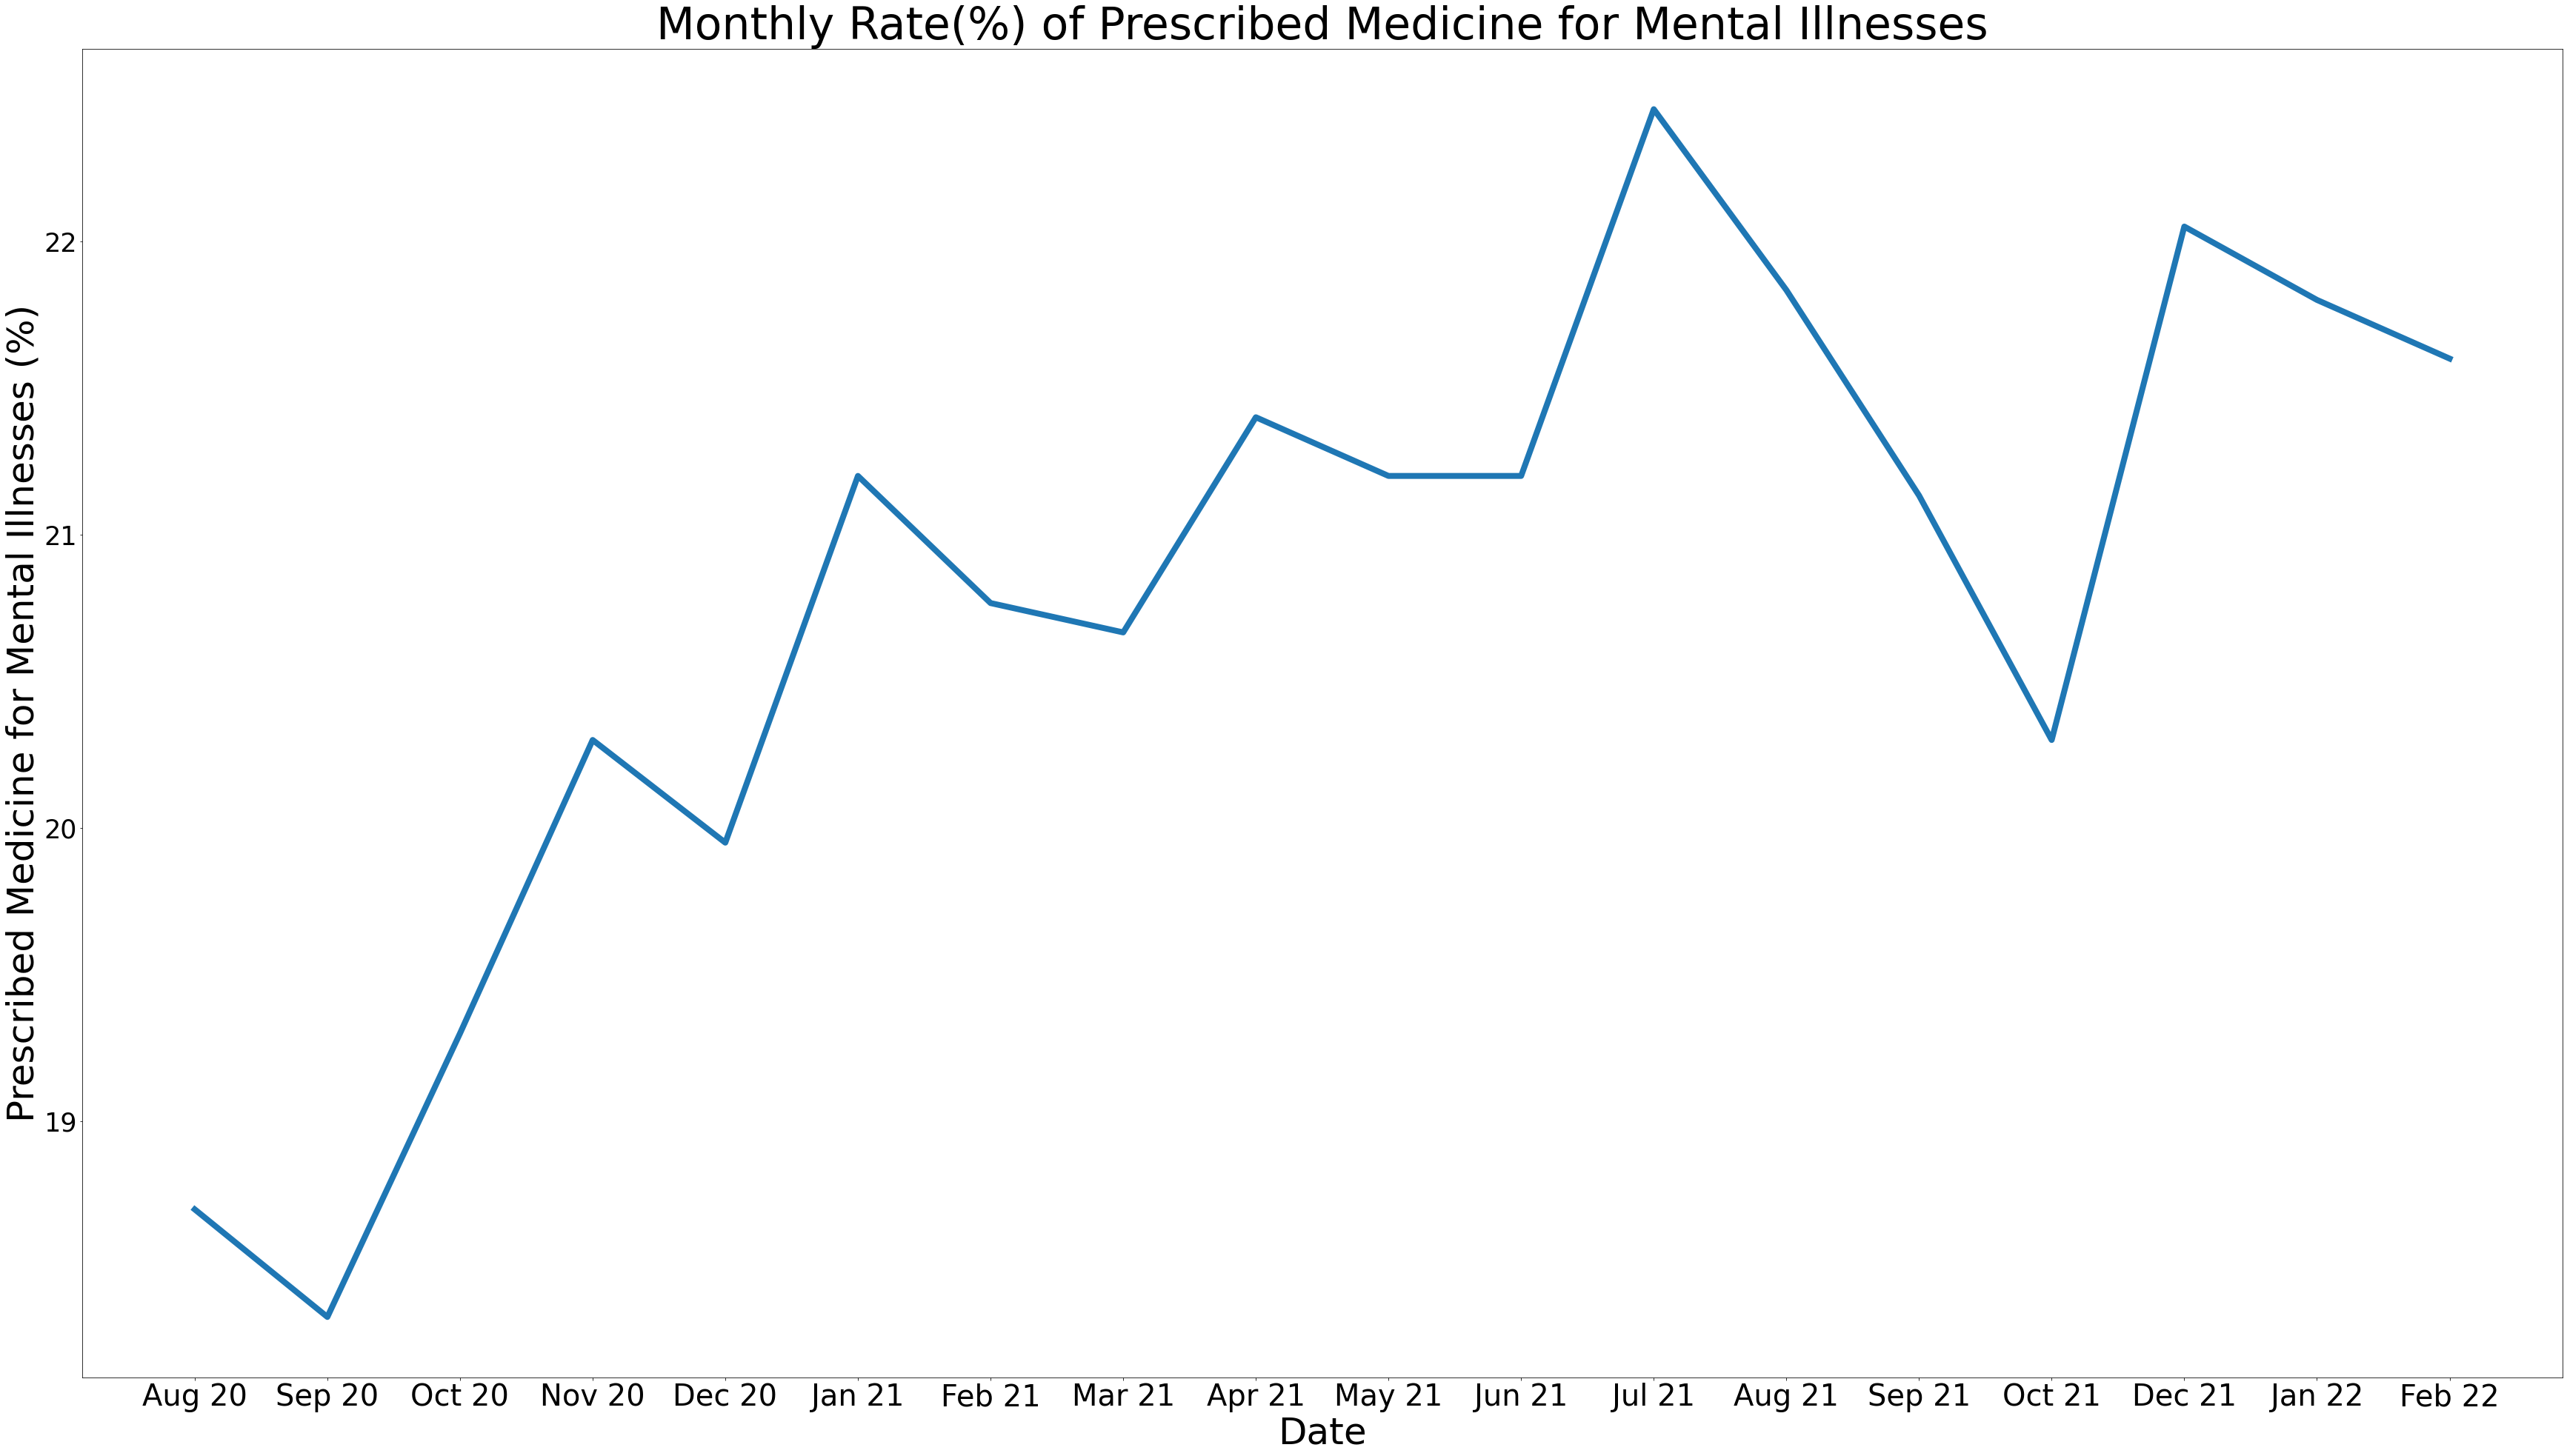

In [73]:
plt.figure(figsize = (60,33))
sns.lineplot(x = 'Months', y = 'Percentage', data = depMin_dataset, linewidth = 8)
plt.title('Monthly Rate(%) of Prescribed Medicine for Mental Illnesses', size = 60)
plt.xlabel('Date', size = 50)
plt.ylabel('Prescribed Medicine for Mental Illnesses (%)', size = 50)
plt.xticks(size = 40)
plt.yticks(size = 35)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

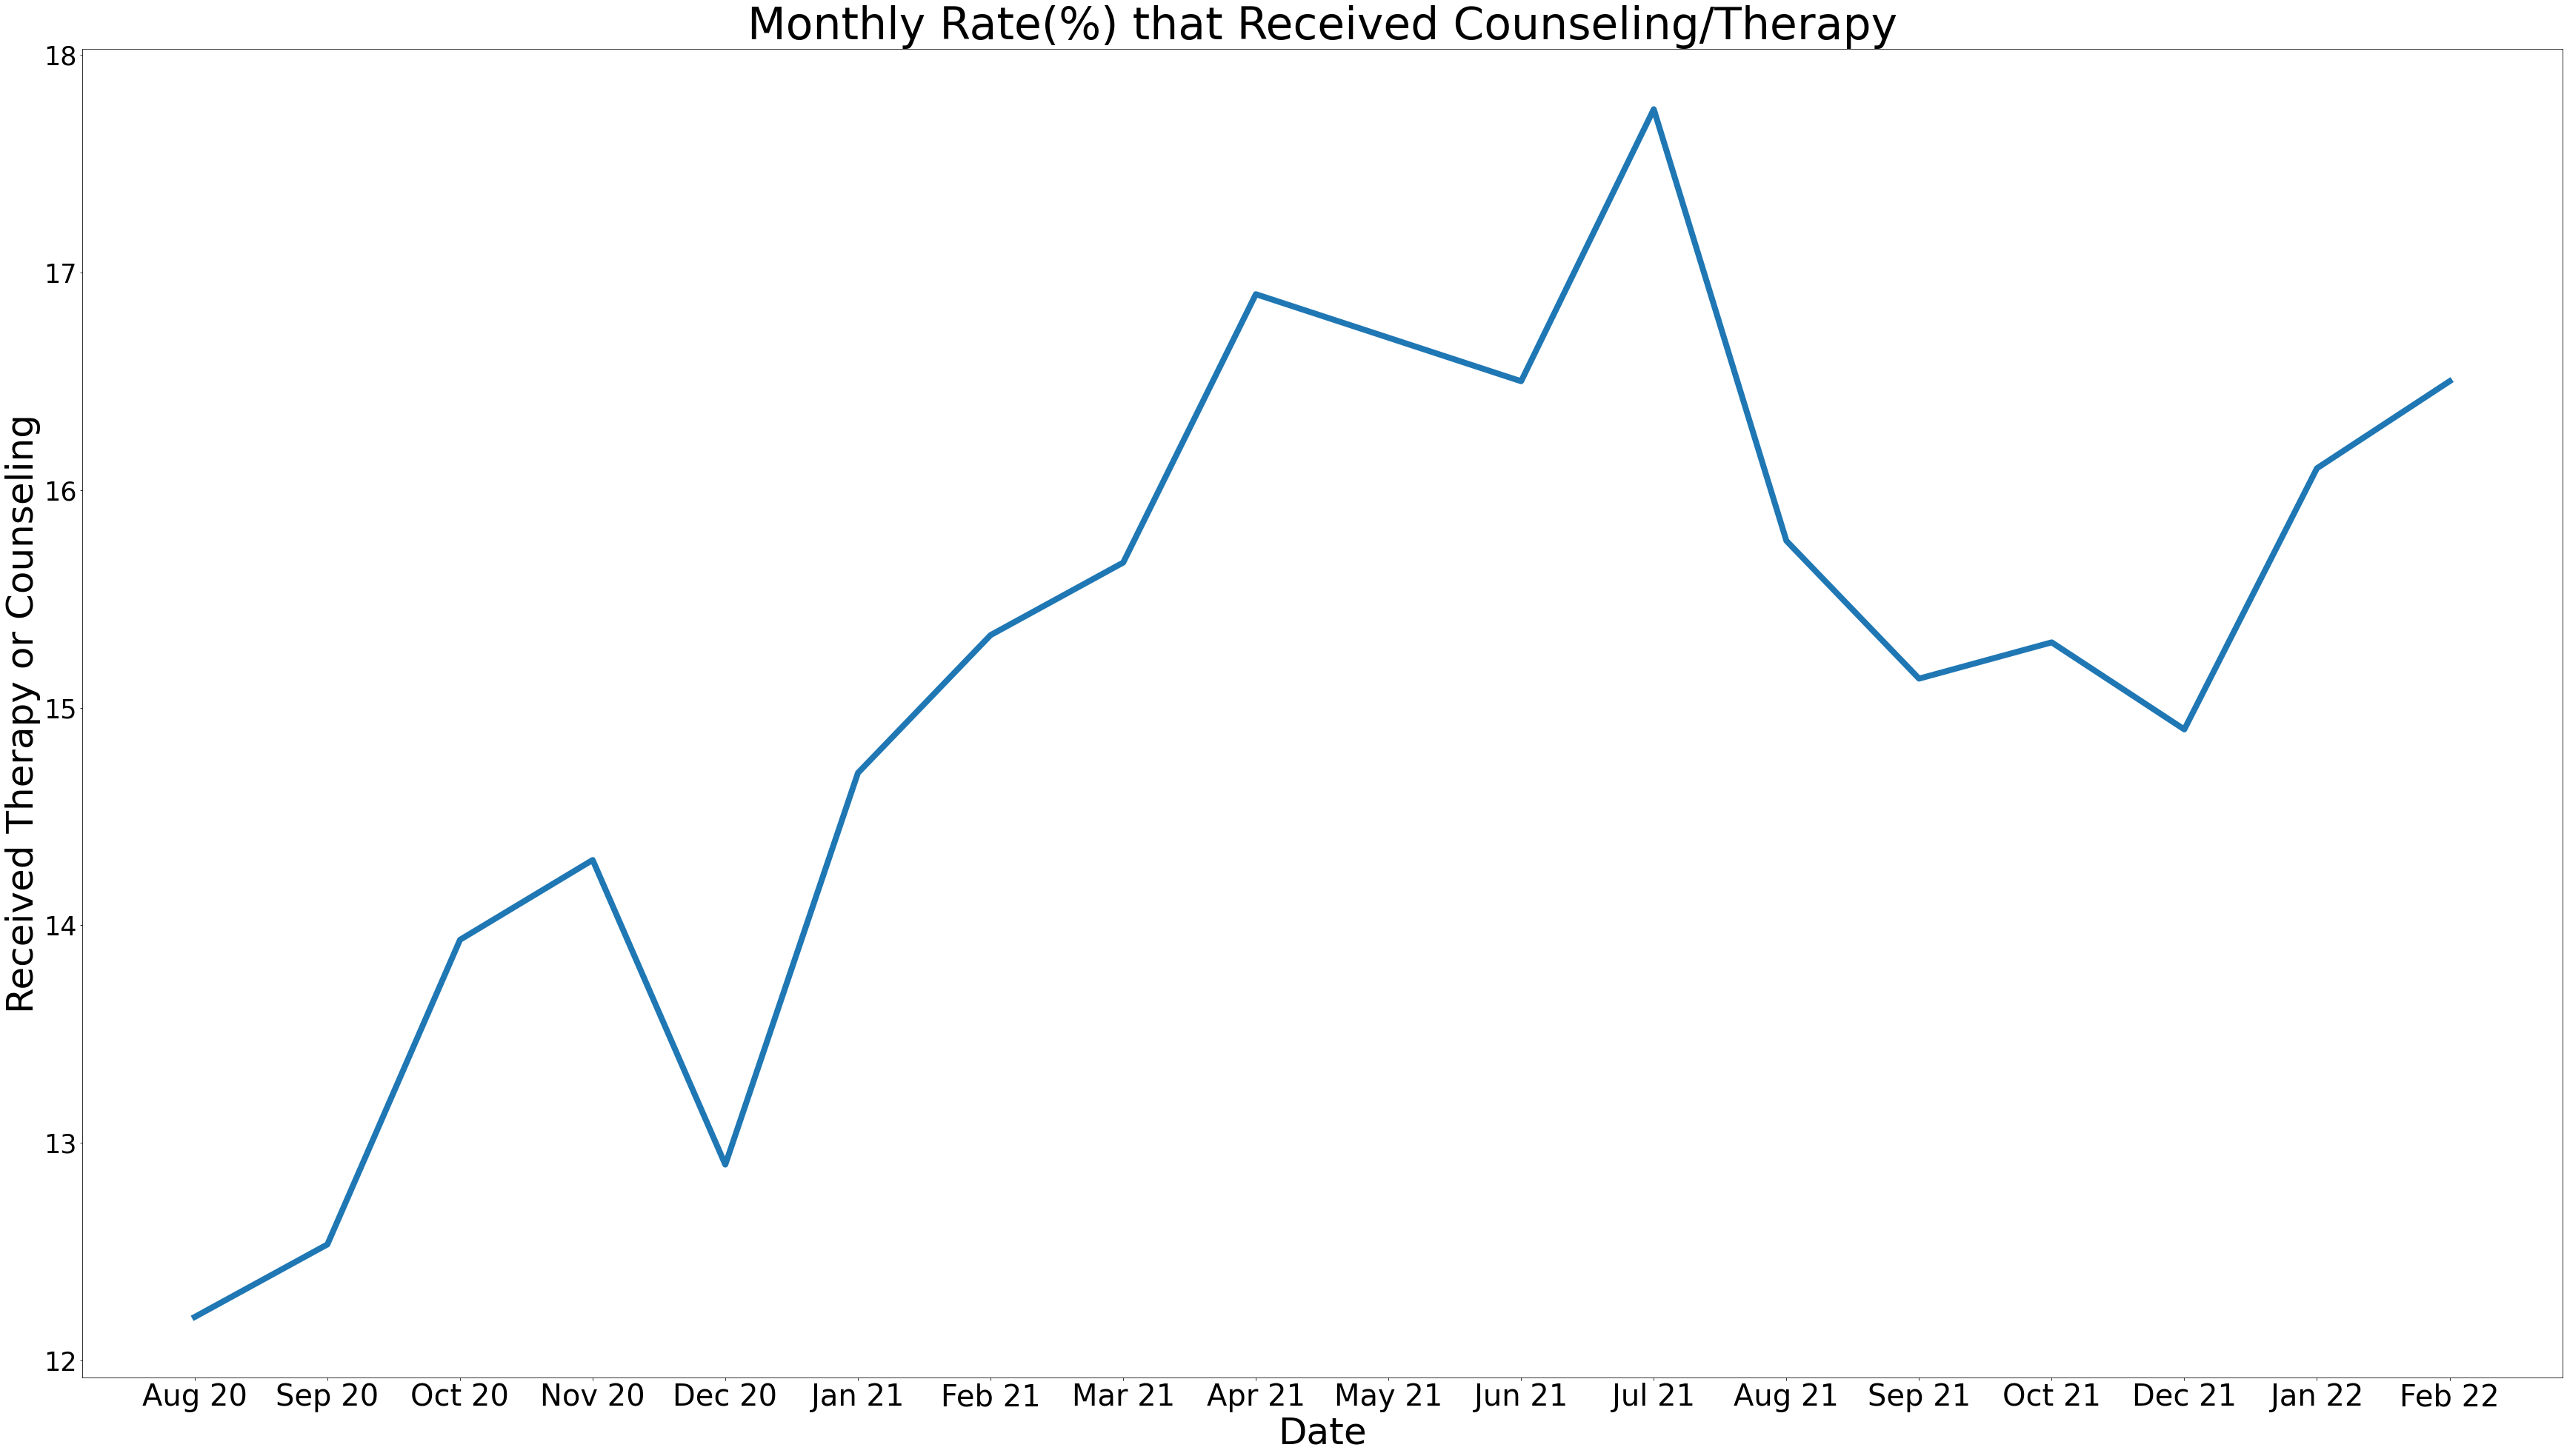

In [74]:
plt.figure(figsize = (60,33))
sns.lineplot(x = 'Months', y = 'Percentage', data = depMaj1_dataset, linewidth = 8)
plt.title('Monthly Rate(%) that Received Counseling/Therapy', size = 60)
plt.xlabel('Date', size = 50)
plt.ylabel('Received Therapy or Counseling', size = 50)
plt.xticks(size = 40)
plt.yticks(size = 35)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

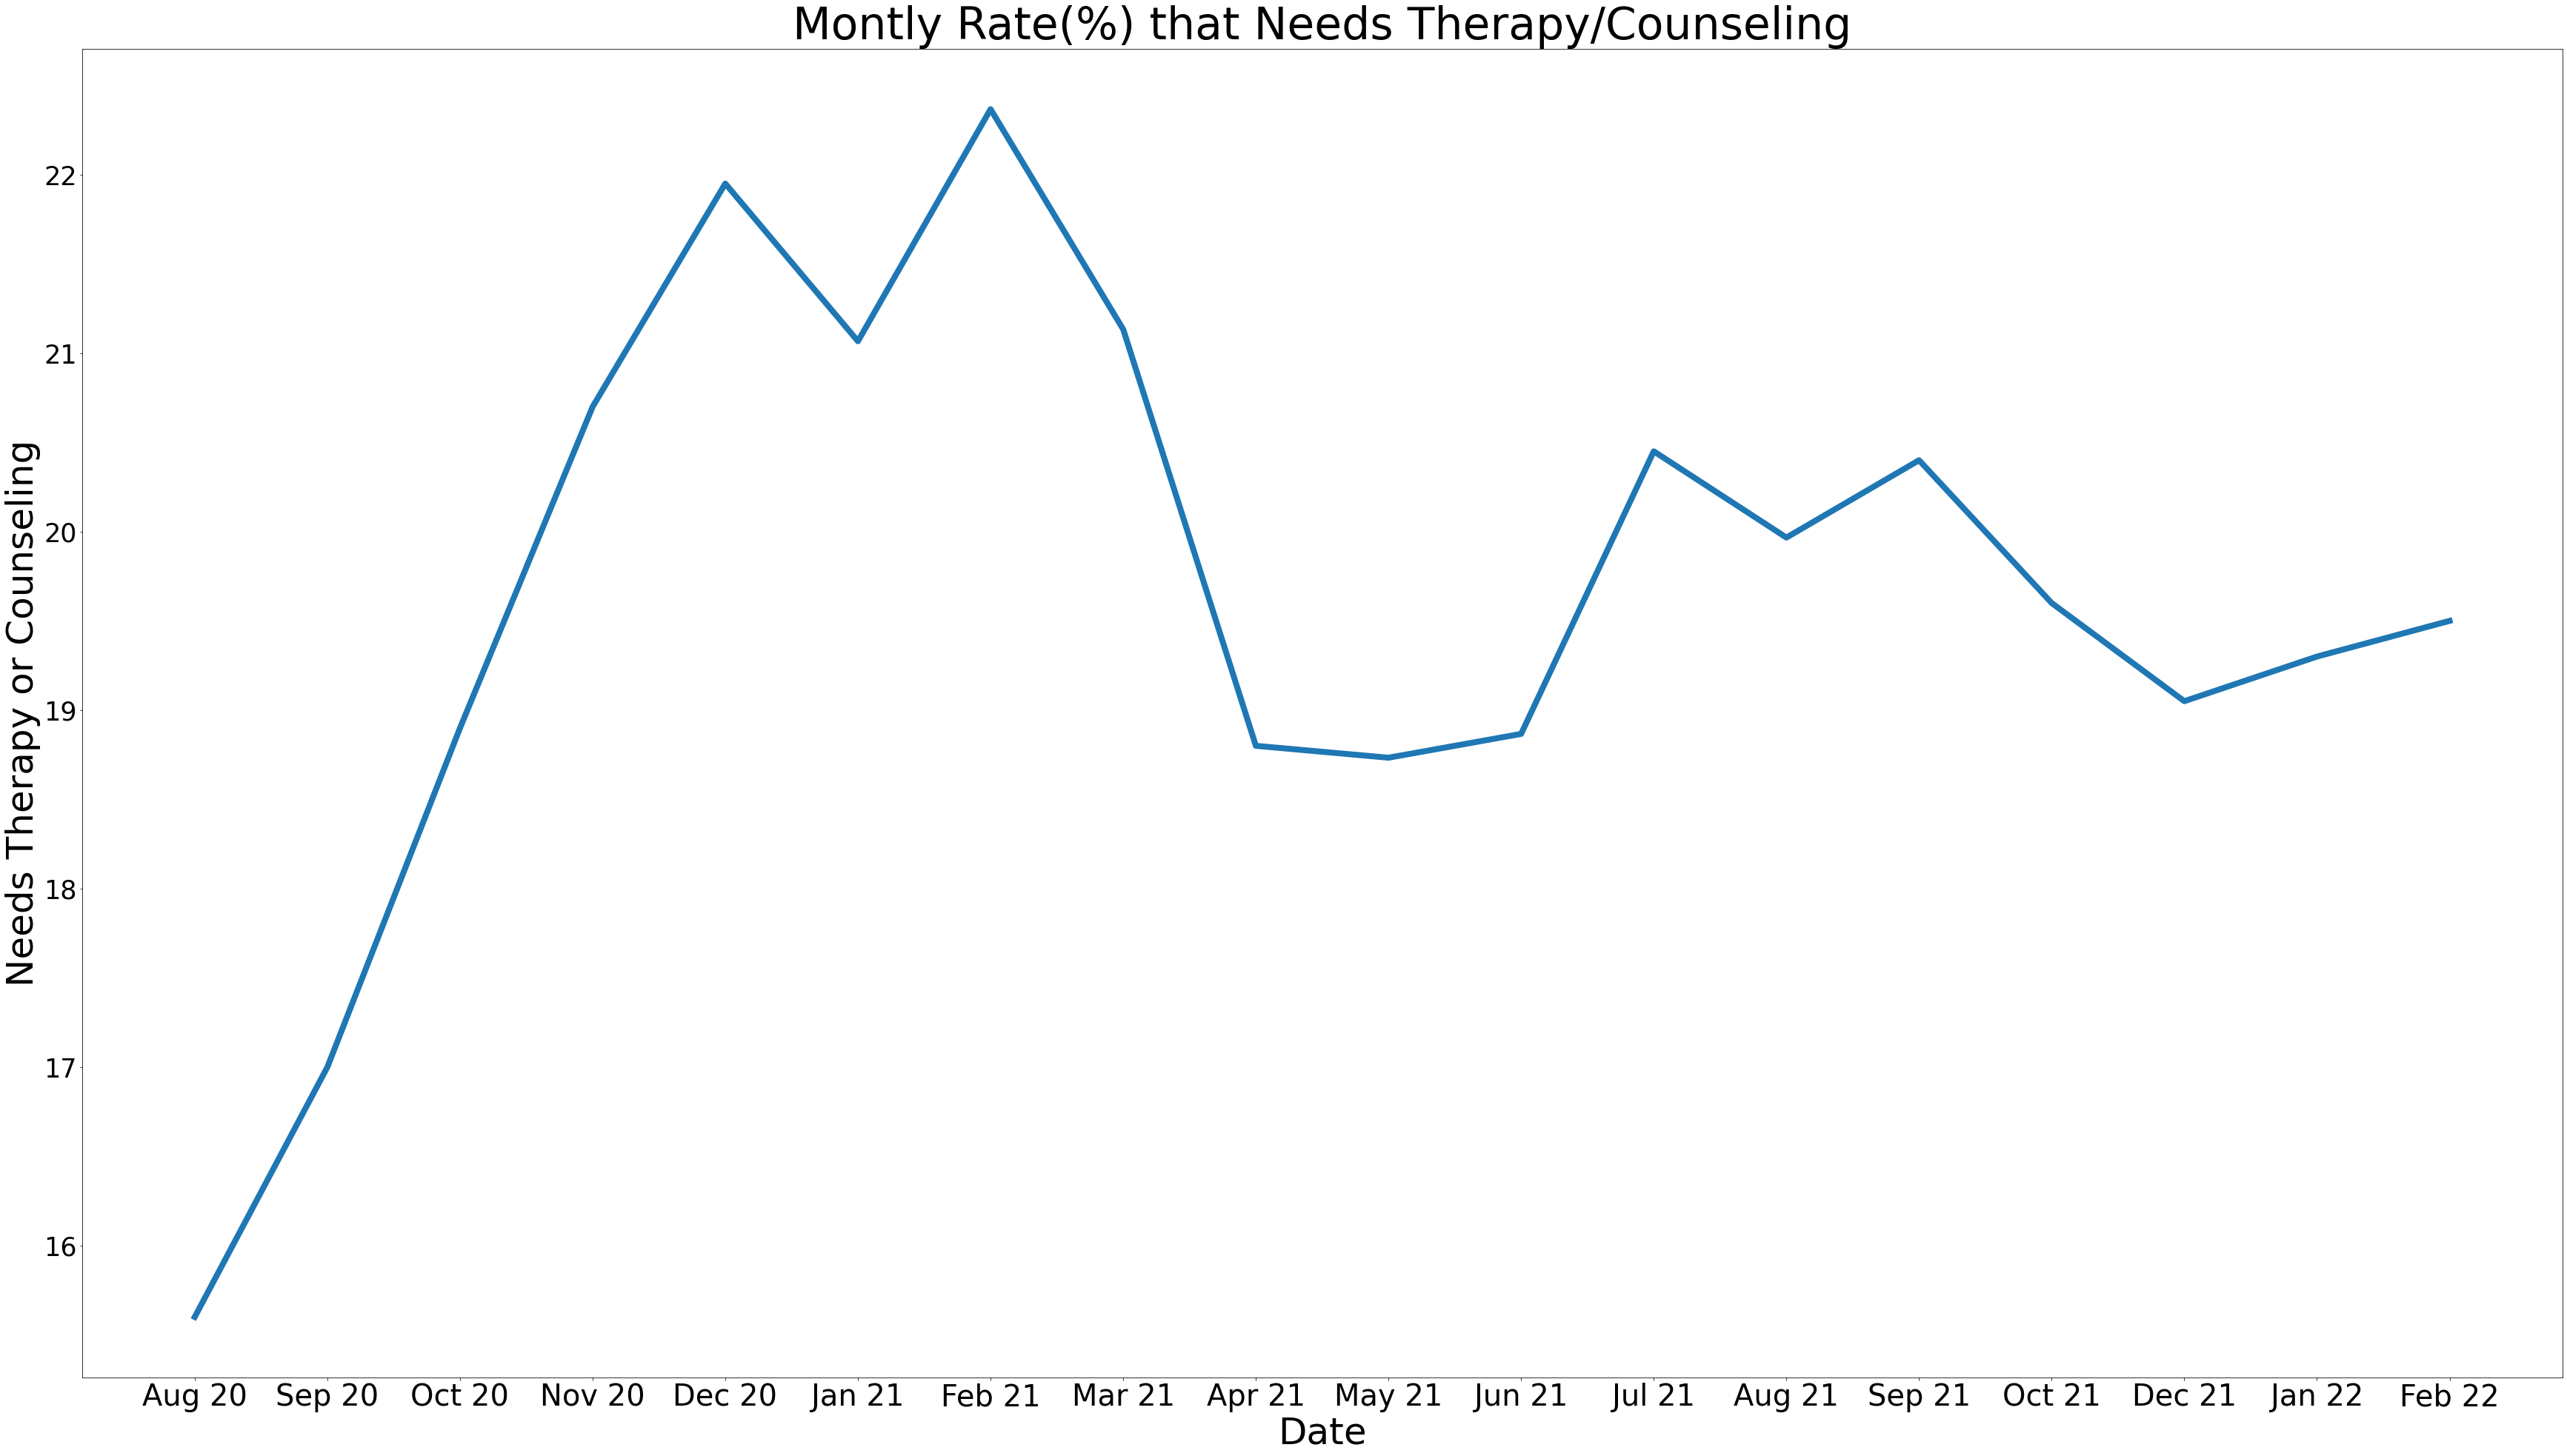

In [75]:
plt.figure(figsize = (60,33))
sns.lineplot(x = 'Months', y = 'Percentage', data = depMaj2_dataset, linewidth = 8)
plt.title('Montly Rate(%) that Needs Therapy/Counseling', size = 60)
plt.xlabel('Date', size = 50)
plt.ylabel('Needs Therapy or Counseling', size = 50)
plt.xticks(size = 40)
plt.yticks(size = 35)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

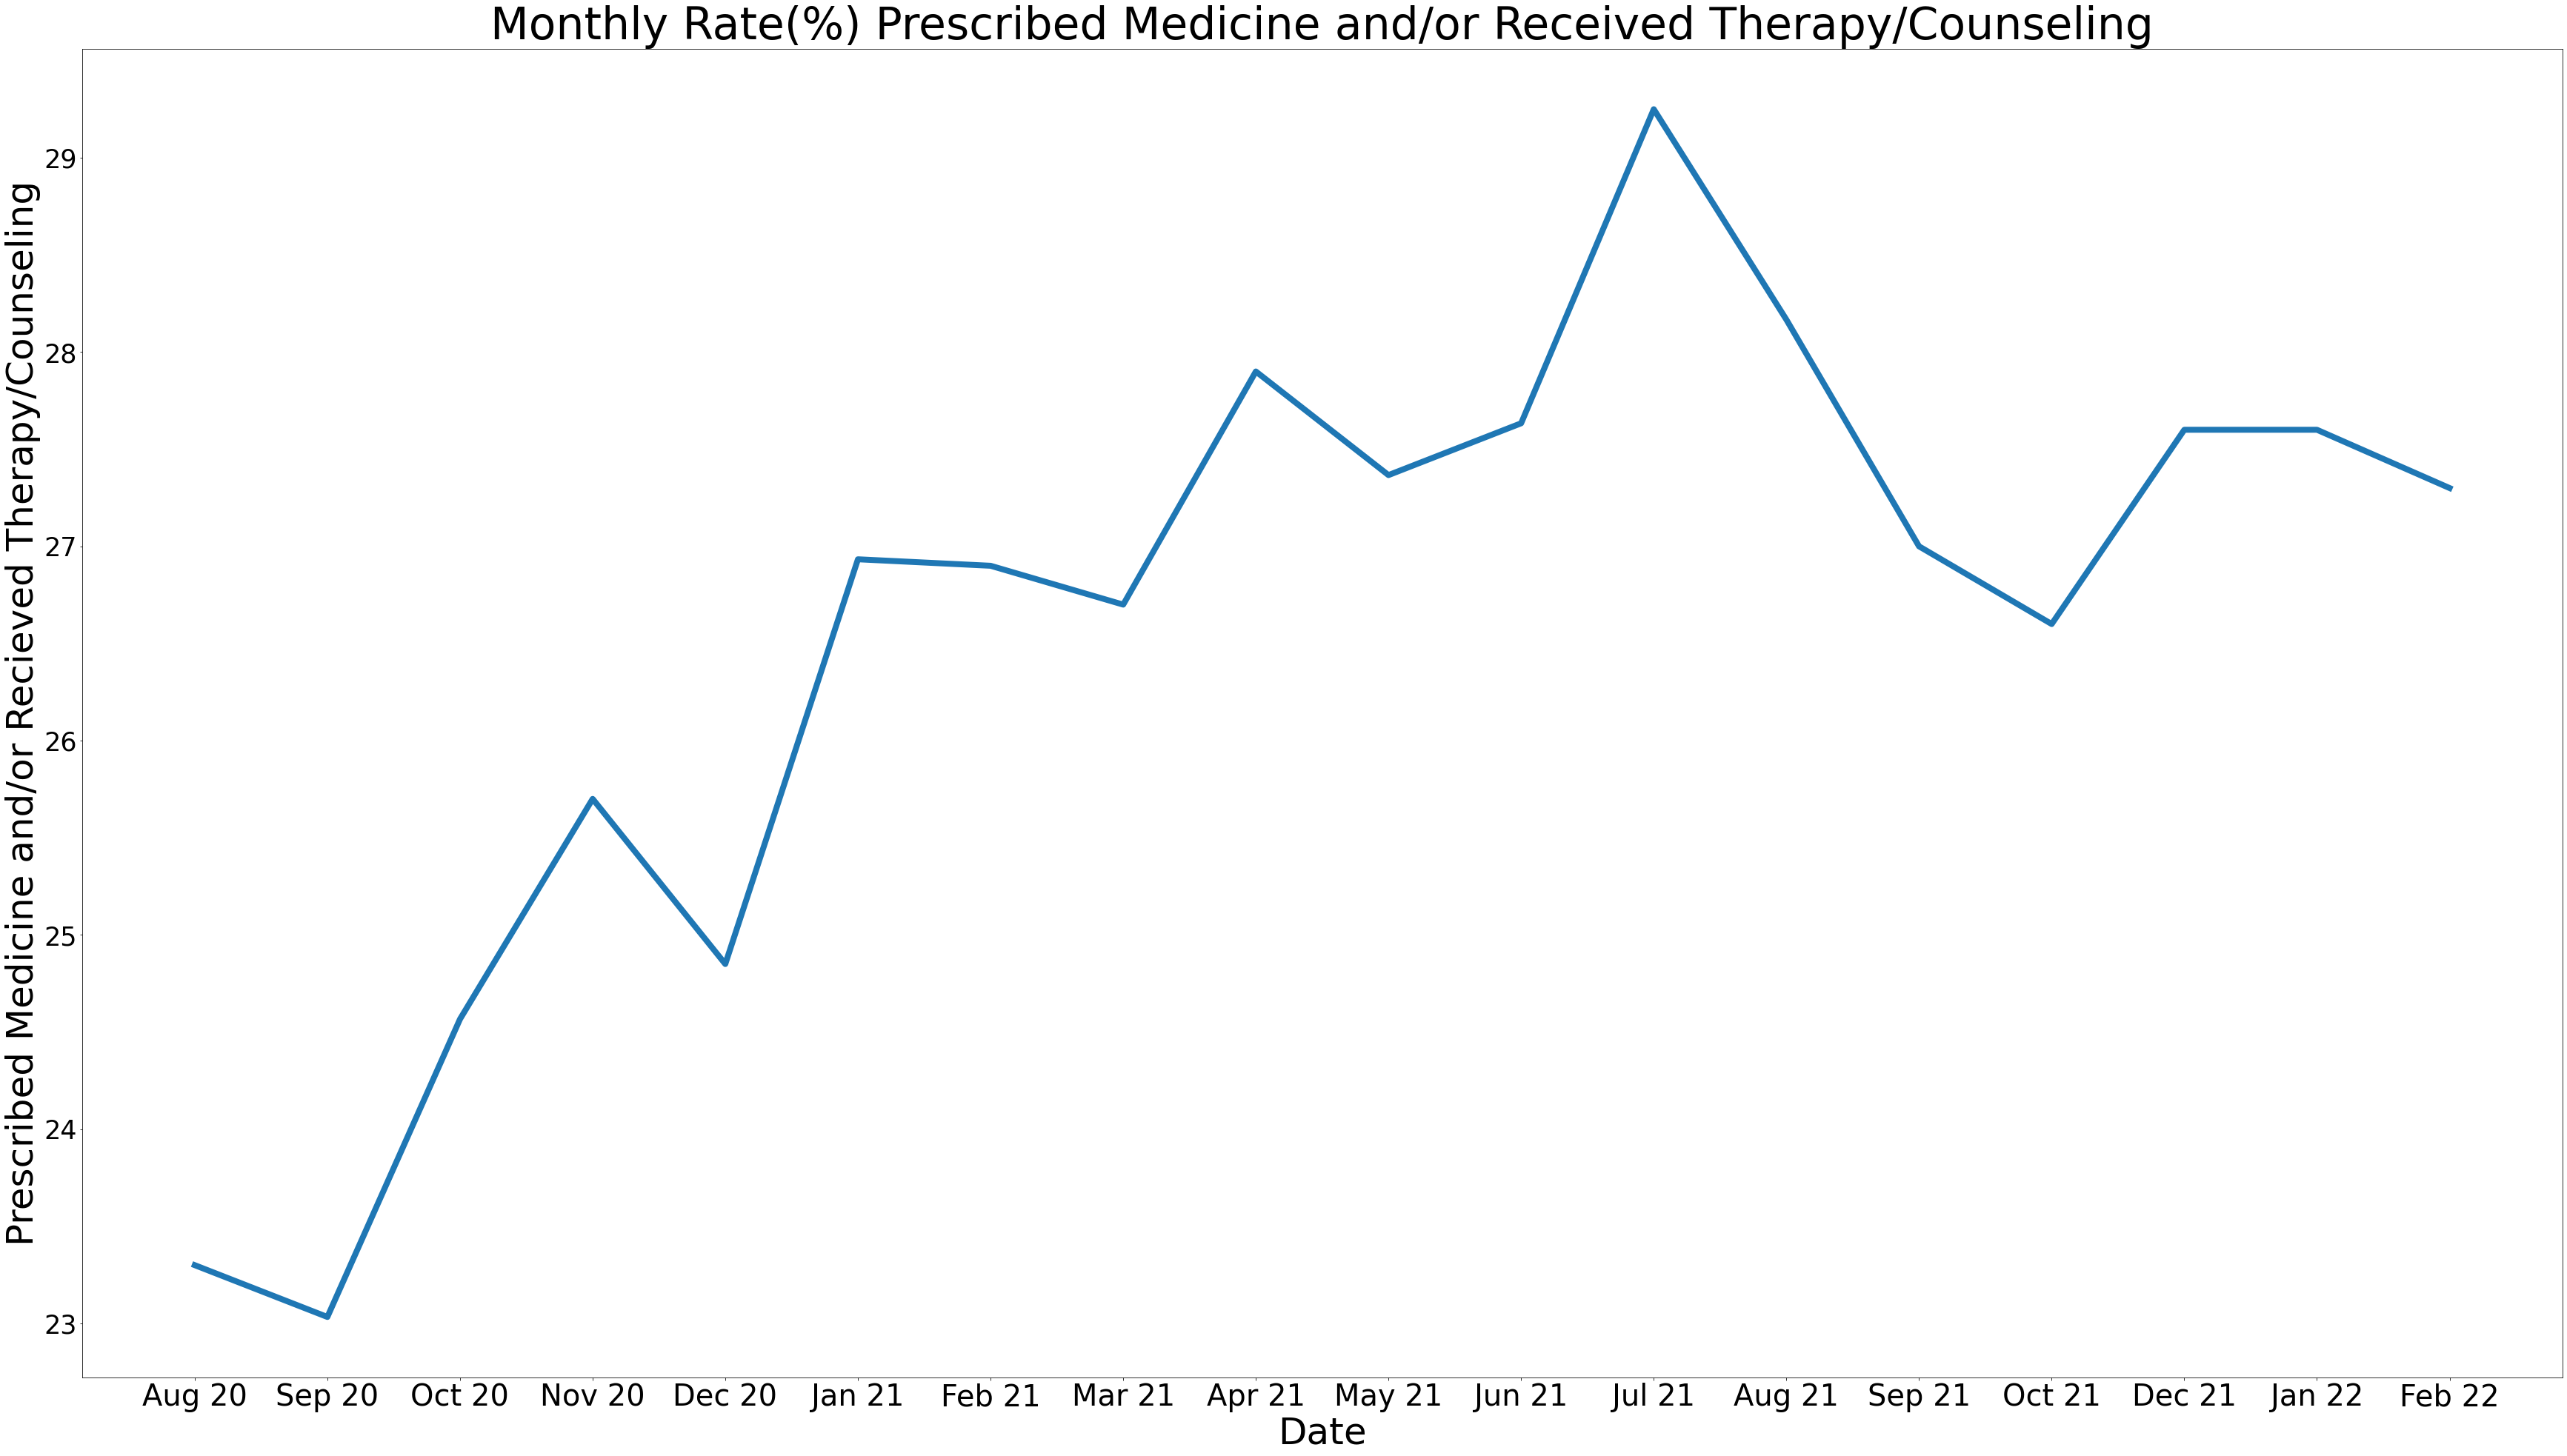

In [76]:
plt.figure(figsize = (60,33))
sns.lineplot(x = 'Months', y = 'Percentage', data = depMajMin_dataset, linewidth = 8)
plt.title('Monthly Rate(%) Prescribed Medicine and/or Received Therapy/Counseling', size = 60)
plt.xlabel('Date', size = 50)
plt.ylabel('Prescribed Medicine and/or Recieved Therapy/Counseling', size = 50)
plt.xticks(size = 40)
plt.yticks(size = 35)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

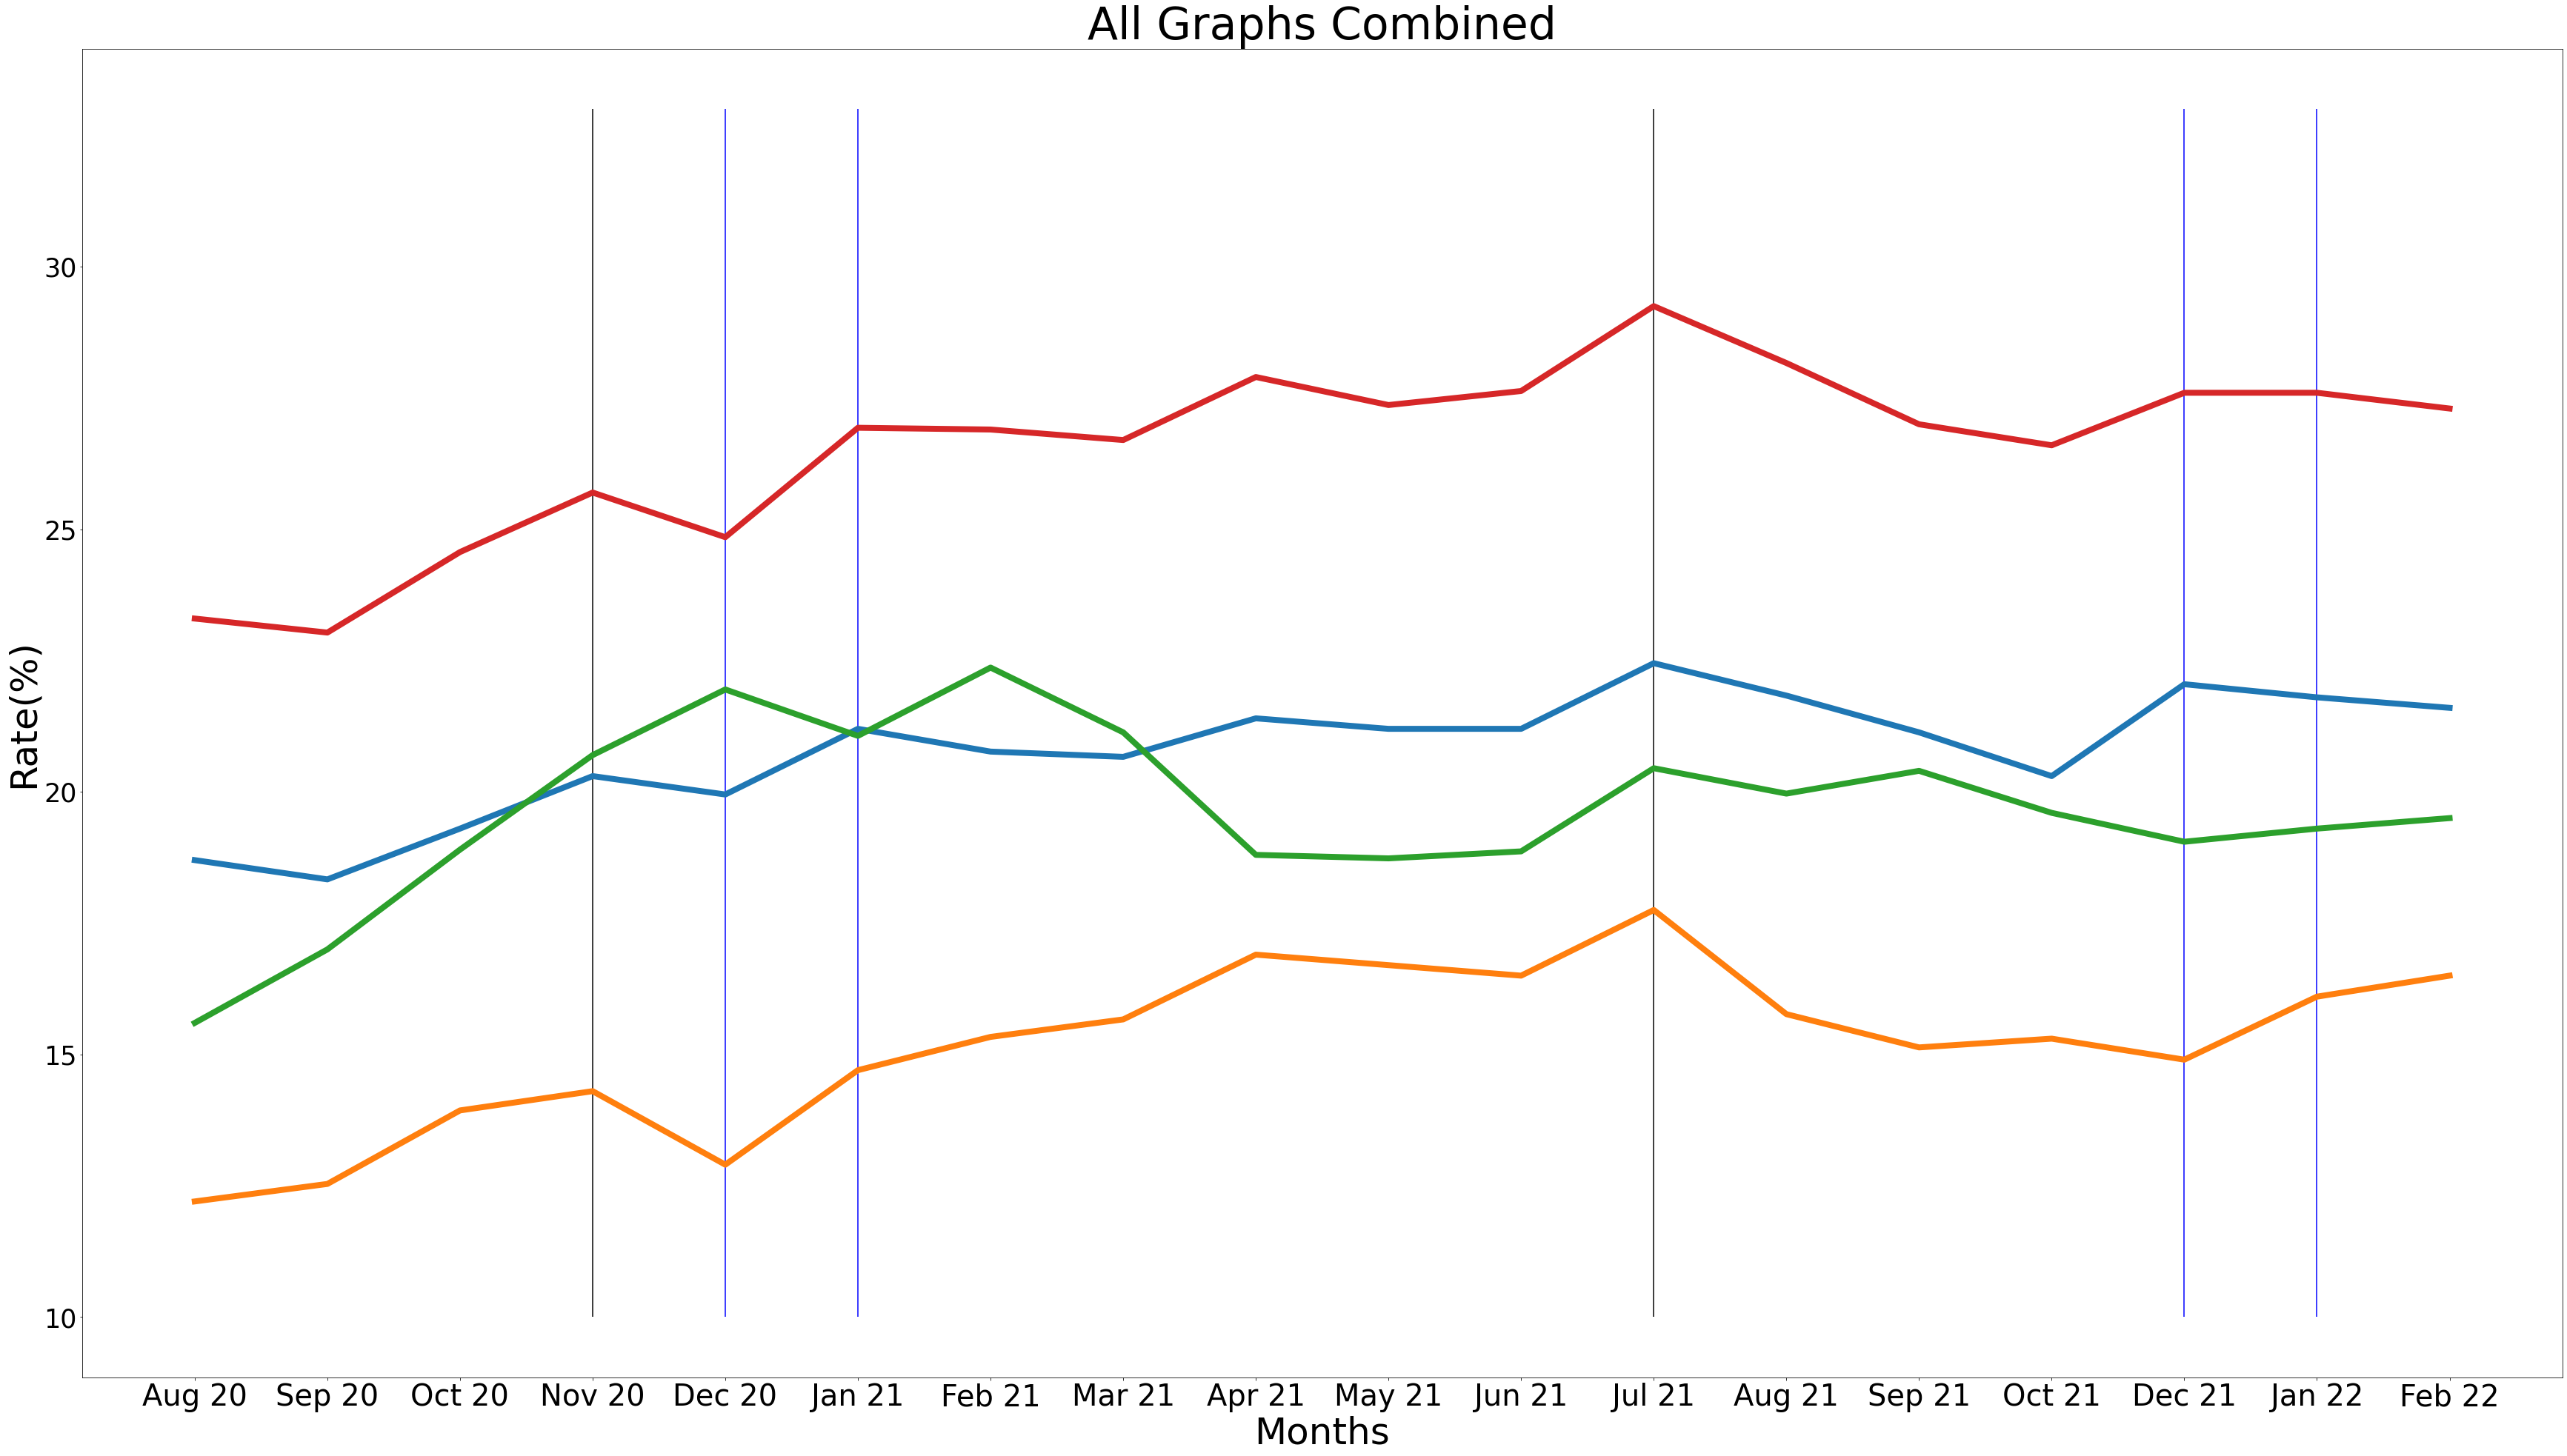

In [77]:
plt.figure(figsize = (60,33))
sns.lineplot(x = 'Months', y = 'Percentage', data = depMin_dataset, linewidth = 8)

sns.lineplot(x = 'Months', y = 'Percentage', data = depMaj1_dataset, linewidth = 8)

sns.lineplot(x = 'Months', y = 'Percentage', data = depMaj2_dataset, linewidth = 8)

sns.lineplot(x = 'Months', y = 'Percentage', data = depMajMin_dataset, linewidth = 8)

plt.title('All Graphs Combined', size = 60)
plt.xlabel('Months', size = 50)
plt.ylabel('Rate(%)', size = 50)
plt.xticks(size = 40)
plt.yticks(size = 35)

plt.vlines(x = 'Jan 21', ymin = 10, ymax = 33, colors = 'blue')
plt.vlines(x = 'Jan 22', ymin = 10, ymax = 33, colors = 'blue')
plt.vlines(x = 'Dec 21', ymin = 10, ymax = 33, colors = 'blue')
plt.vlines(x = 'Dec 20', ymin = 10, ymax = 33, colors = 'blue')

plt.vlines(x = 'Jul 21', ymin = 10, ymax = 33, colors = 'black')
plt.vlines(x = 'Nov 20', ymin = 10, ymax = 33, colors = 'black')

plt.show

From the plot above, we can determine that the rate of mental illness indicators all increased 
from the start of covid to Feburary 2022. After observing the graph November 2020 and July 2021 
***(the black vertical lines)*** seem to be when all four variables are either reaching a peak or increasing. 
However the points that were outliers in the covid_cases ***(the blue vertical lines)*** dataset do not 
seem to have much of a presence in the mental illness datasets.

However as stated before this could merely be because mental illnesses usually develop over a long period of time.
The stressors caused from covid that can heighten the likelihood of suffering from a mental illness usually starts  
developing months after a spike, which could explain why the an increase in covid cases is not followed by an 
decrease in mental health (increase in rate of mental illness).

## Creating Scatterplots for Mental Illness vs. Covid Cases

After seeing the trend for both the datasets in Mental Illnesses and Covid Cases, we 
created a scatter plot, the x-axis being Covid Cases and the y-axis being our major/minor depressive disorder variables.
Since the months for both datasets were equal to each other, we just added the column that contained
the covid cases to one of the mental illness datasets using the join() method. 

We decided to create a regplot since it showed both the scatter plot and the best fit line (regression) for 
the scatter plot. The blue shadow surrounding the regression line shows that there is a lot of error in the regression with the points on the graph.
Looking at the data there does not seem to be a lot of correlation between the two data sets, and the 
regression line does not seem to have a steep enough slope to justify a correlation.

<function matplotlib.pyplot.show(close=None, block=None)>

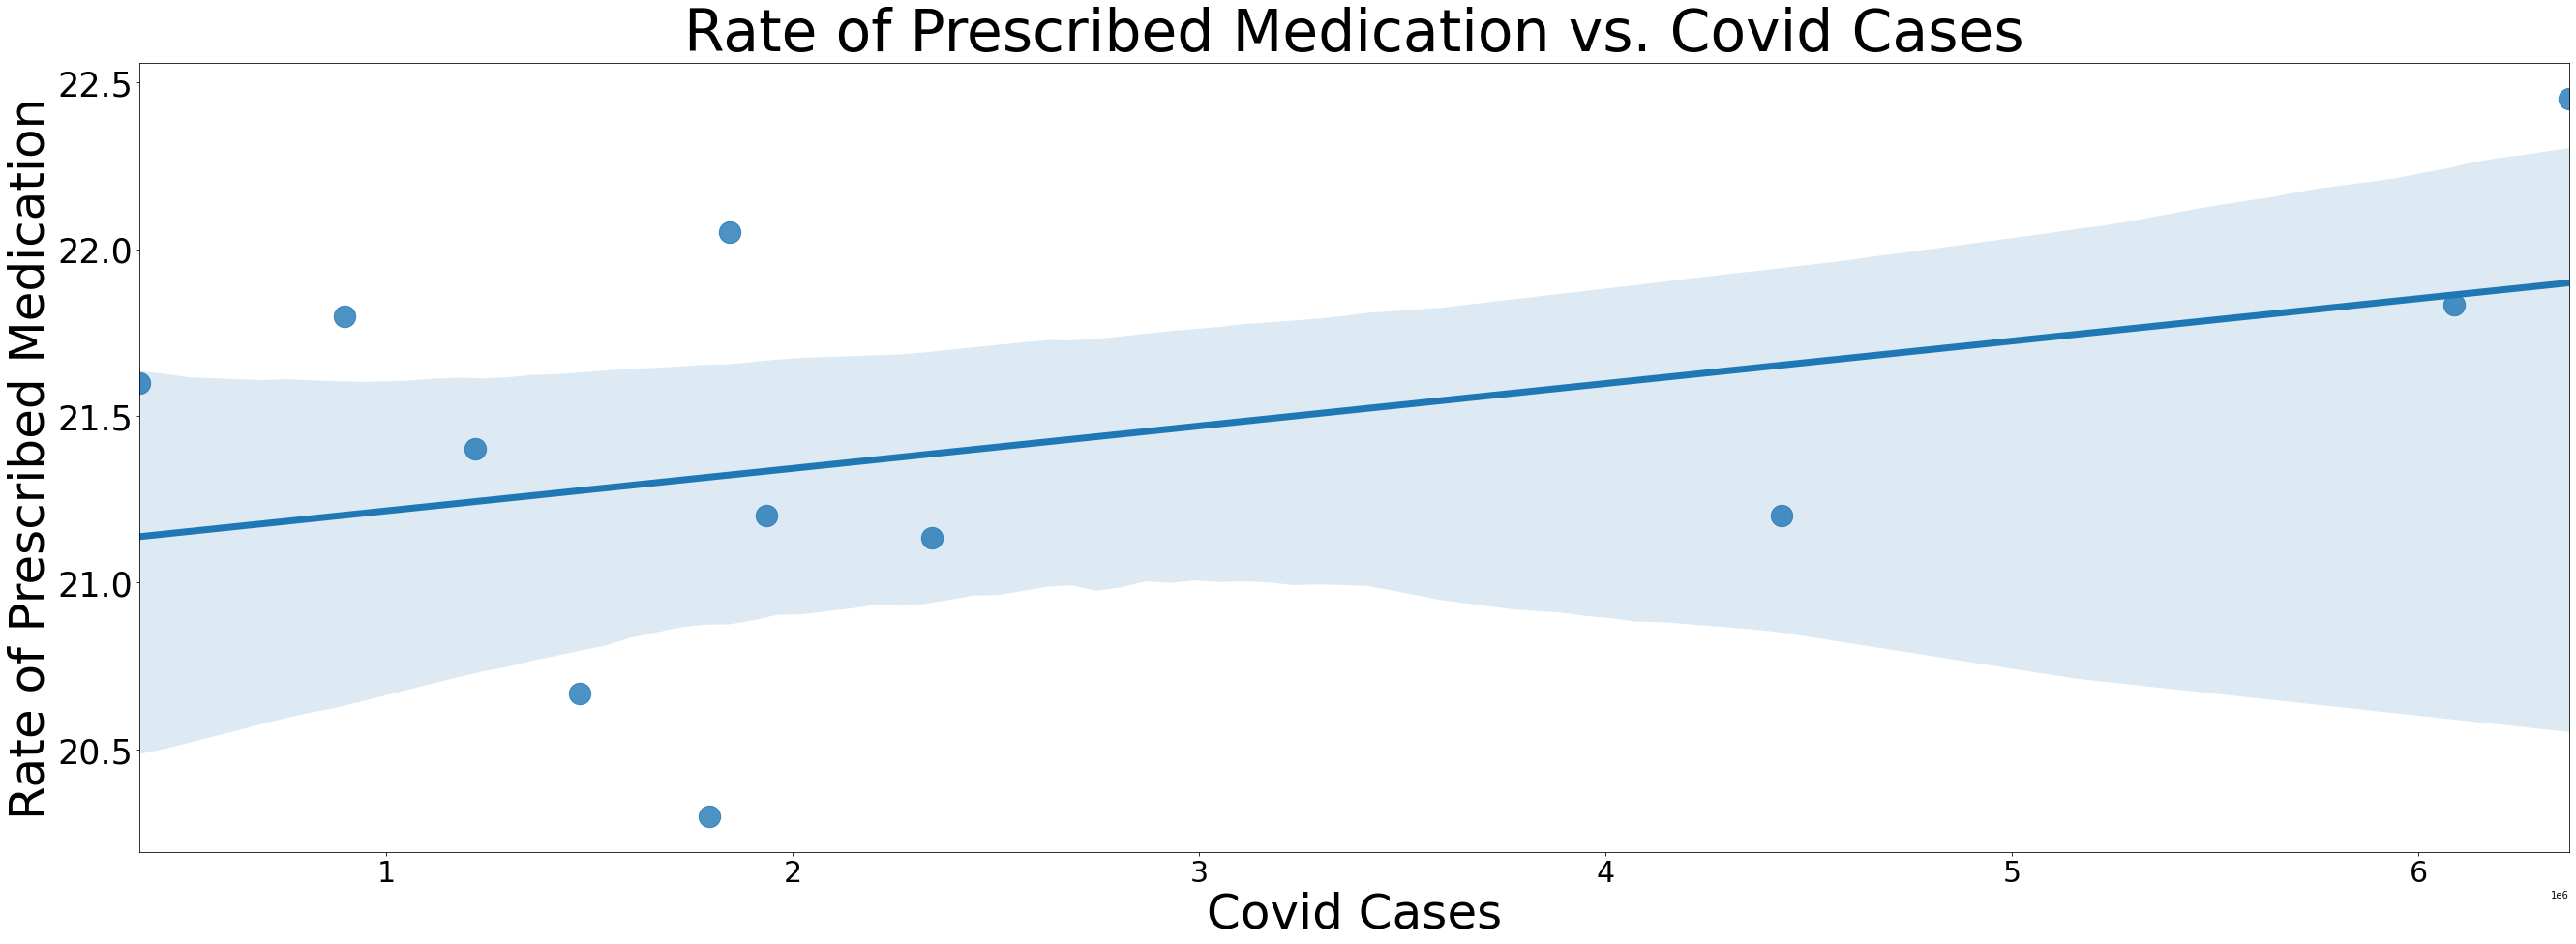

In [78]:
cases_depMin = covid_cases.join(depMin_dataset['Percentage'])

plt.figure(figsize = (45,15))
sns.regplot(x='Cases', y = 'Percentage', data = cases_depMin, scatter_kws = {'s' : 500}, line_kws={'linewidth':7})

plt.title('Rate of Prescribed Medication vs. Covid Cases', size = 60)
plt.xlabel('Covid Cases', size = 50)
plt.ylabel('Rate of Prescribed Medication', size = 50)
plt.xticks(size = 30)
plt.yticks(size = 35)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

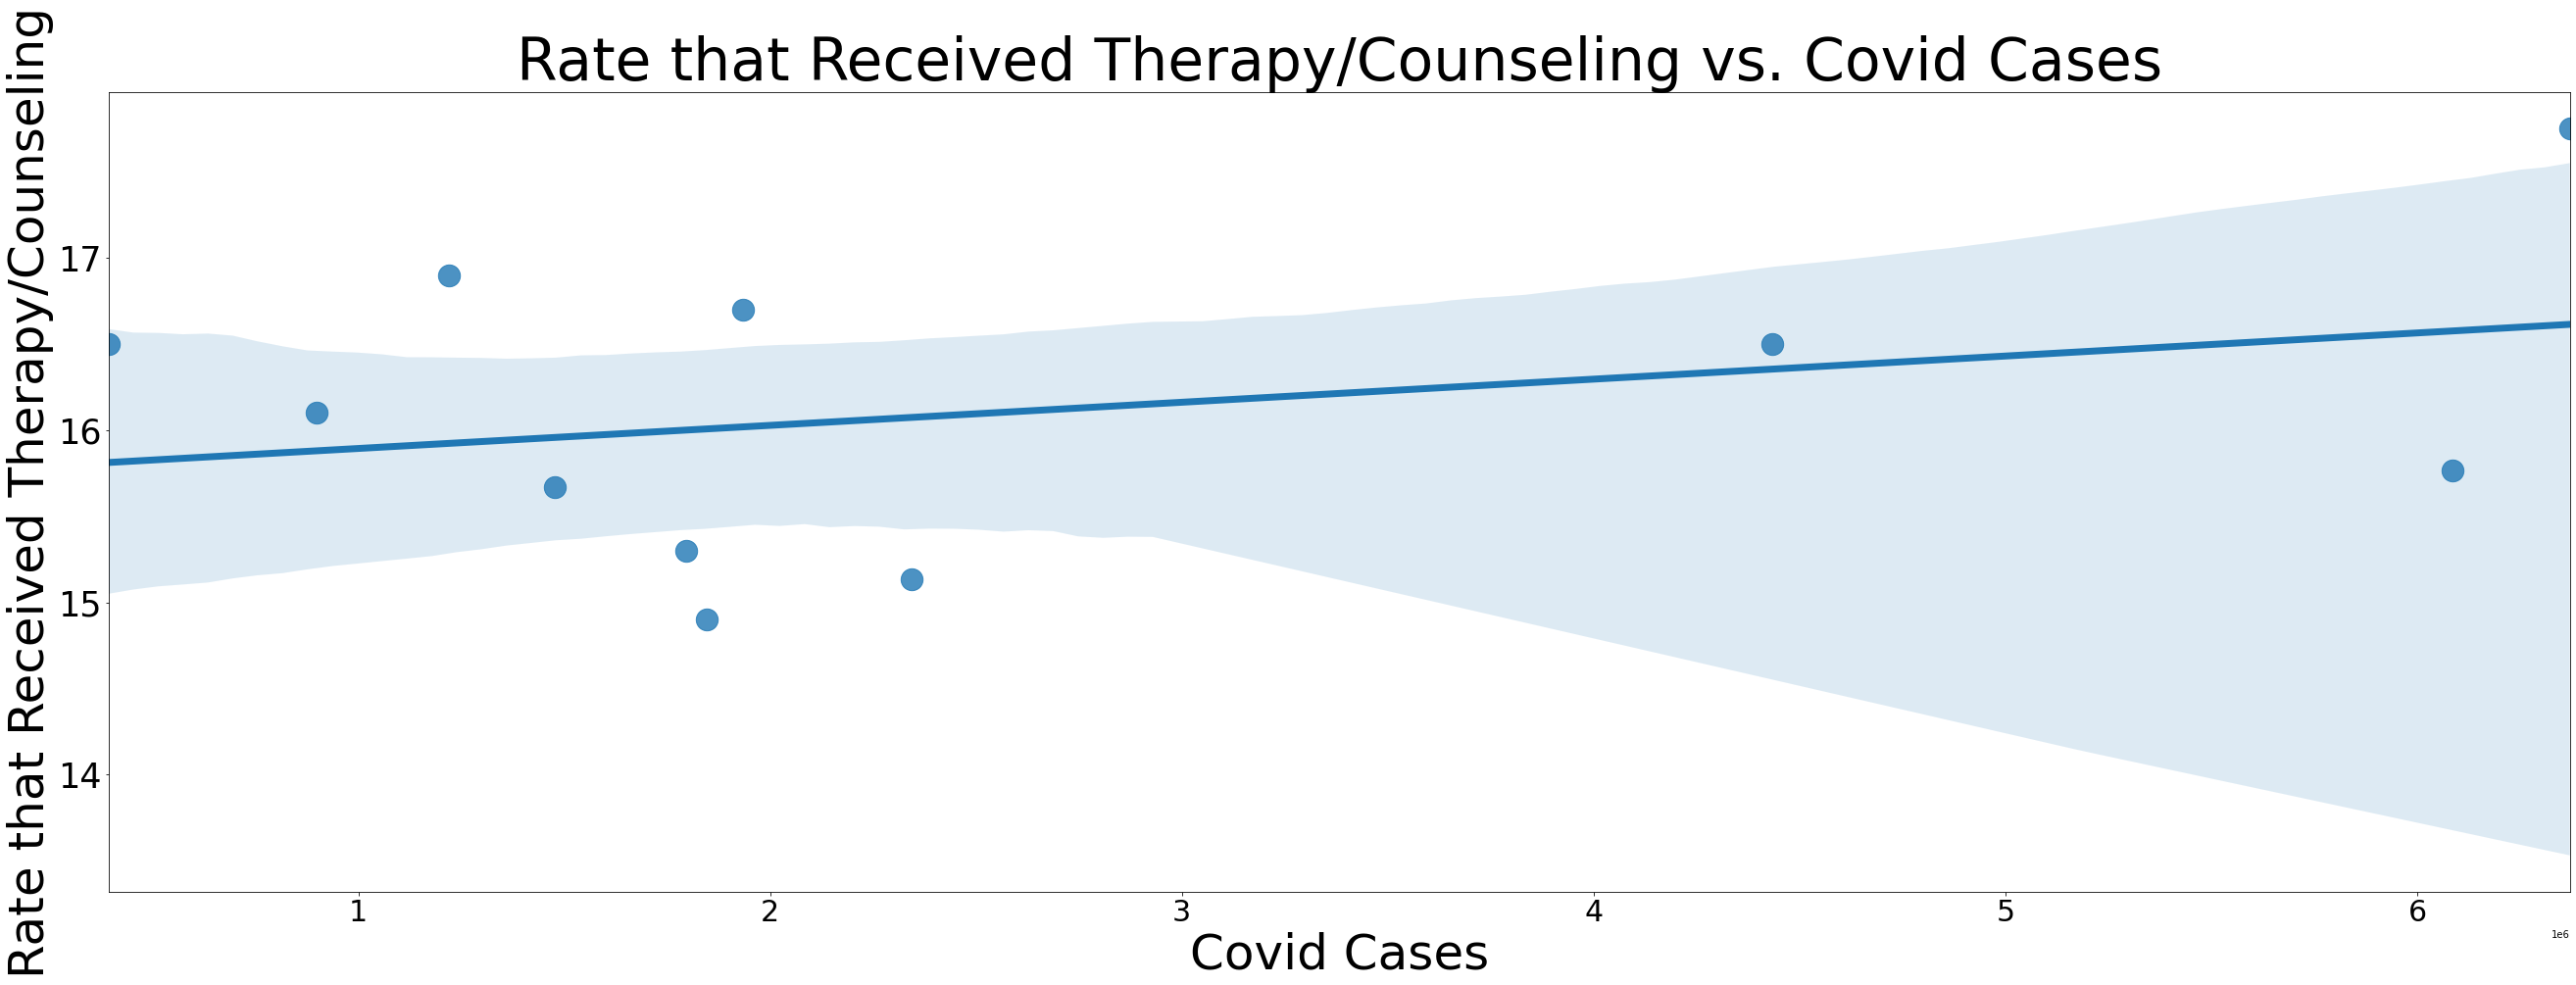

In [79]:
cases_depMaj1 = covid_cases.join(depMaj1_dataset['Percentage'])

plt.figure(figsize = (45,15))
sns.regplot(x='Cases', y = 'Percentage', data = cases_depMaj1, scatter_kws = {'s' : 500}, line_kws={'linewidth':7})
plt.title('Rate that Received Therapy/Counseling vs. Covid Cases', size = 60)
plt.xlabel('Covid Cases', size = 50)
plt.ylabel('Rate that Received Therapy/Counseling', size = 50)
plt.xticks(size = 30)
plt.yticks(size = 35)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

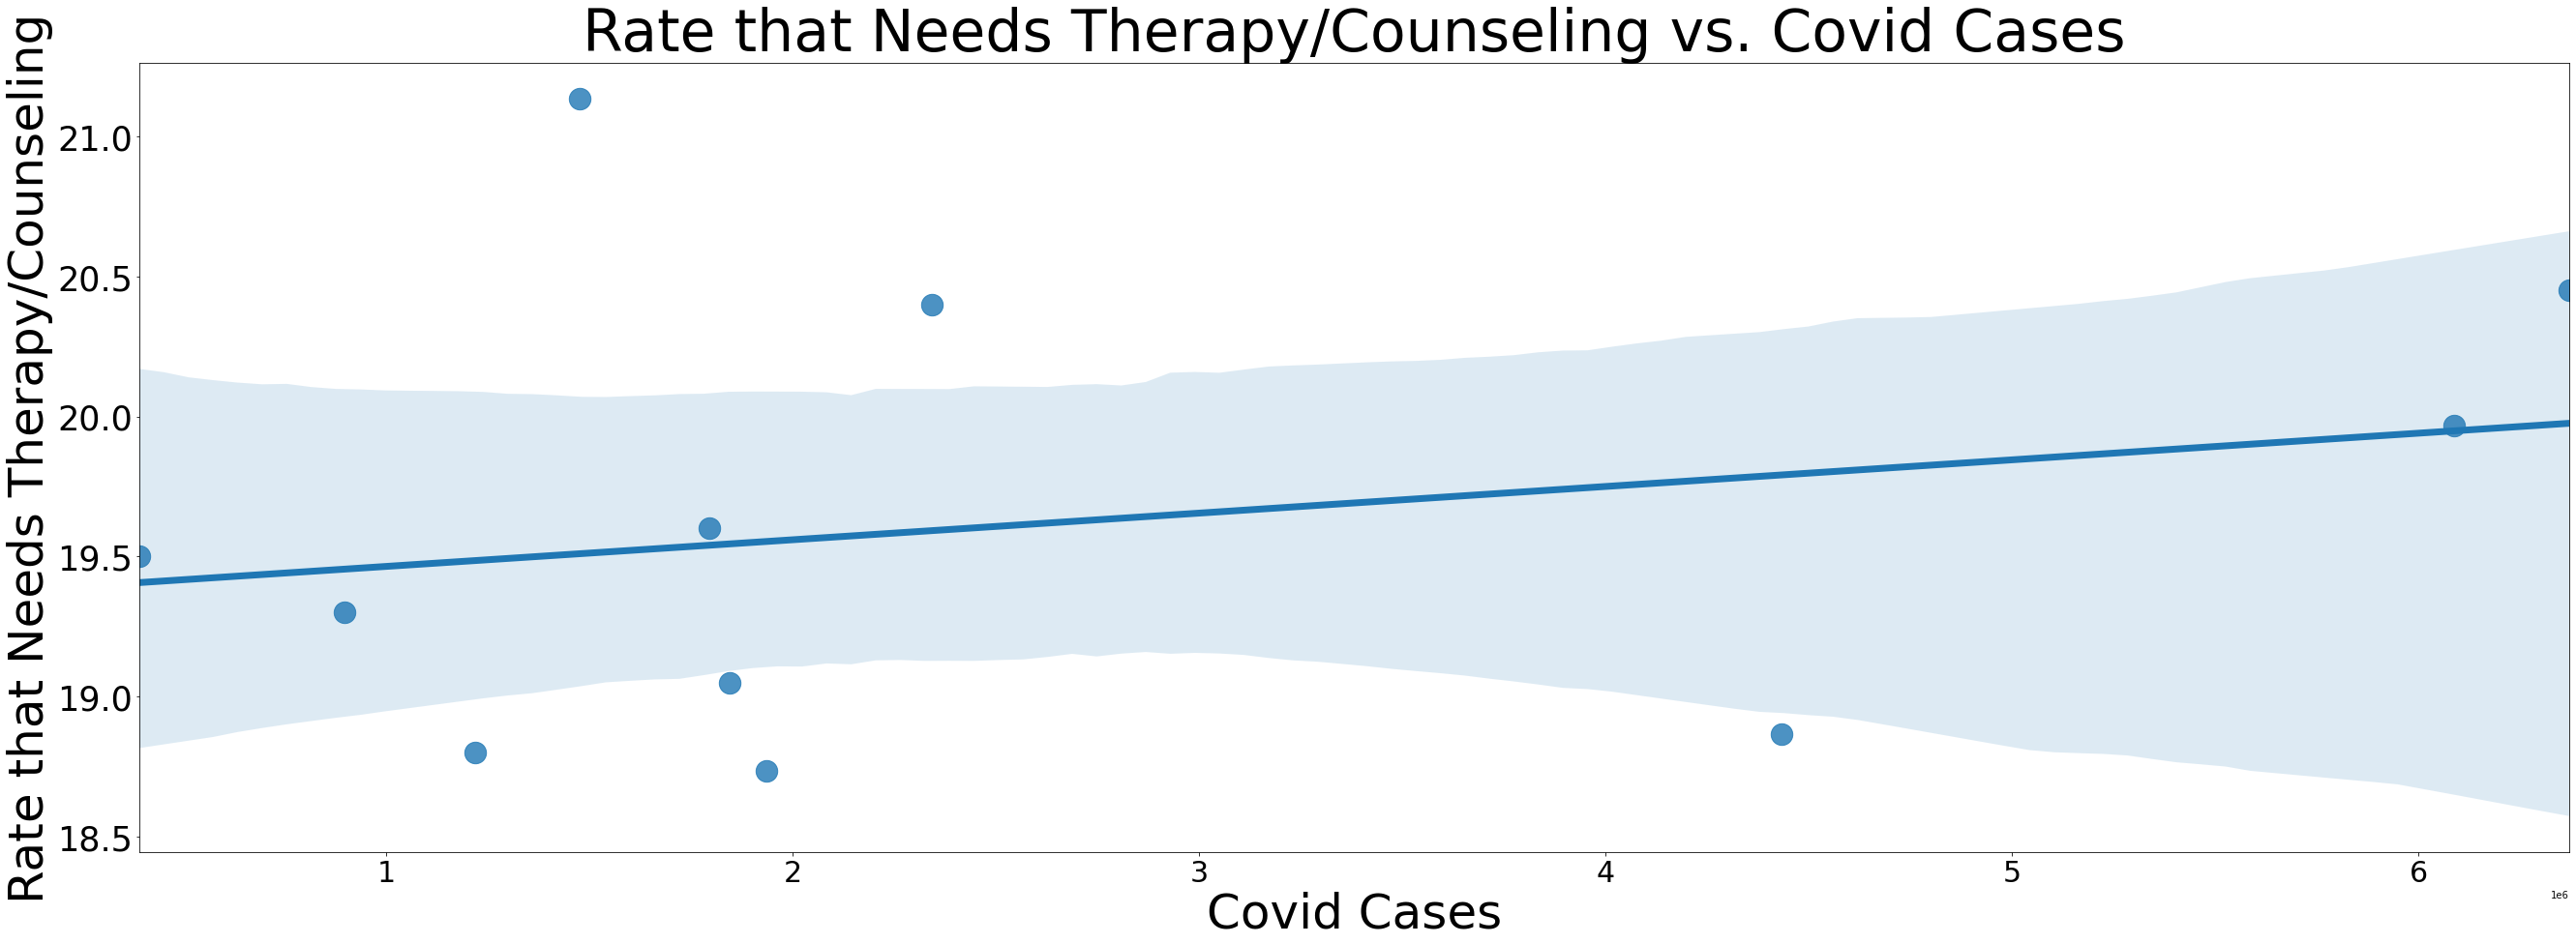

In [80]:
cases_depMaj2 = covid_cases.join(depMaj2_dataset['Percentage'])

plt.figure(figsize = (45,15))
sns.regplot(x='Cases', y = 'Percentage', data = cases_depMaj2, scatter_kws = {'s' : 500}, line_kws={'linewidth':7})
plt.title('Rate that Needs Therapy/Counseling vs. Covid Cases', size = 60)
plt.xlabel('Covid Cases', size = 50)
plt.ylabel('Rate that Needs Therapy/Counseling', size = 50)
plt.xticks(size = 30)
plt.yticks(size = 35)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

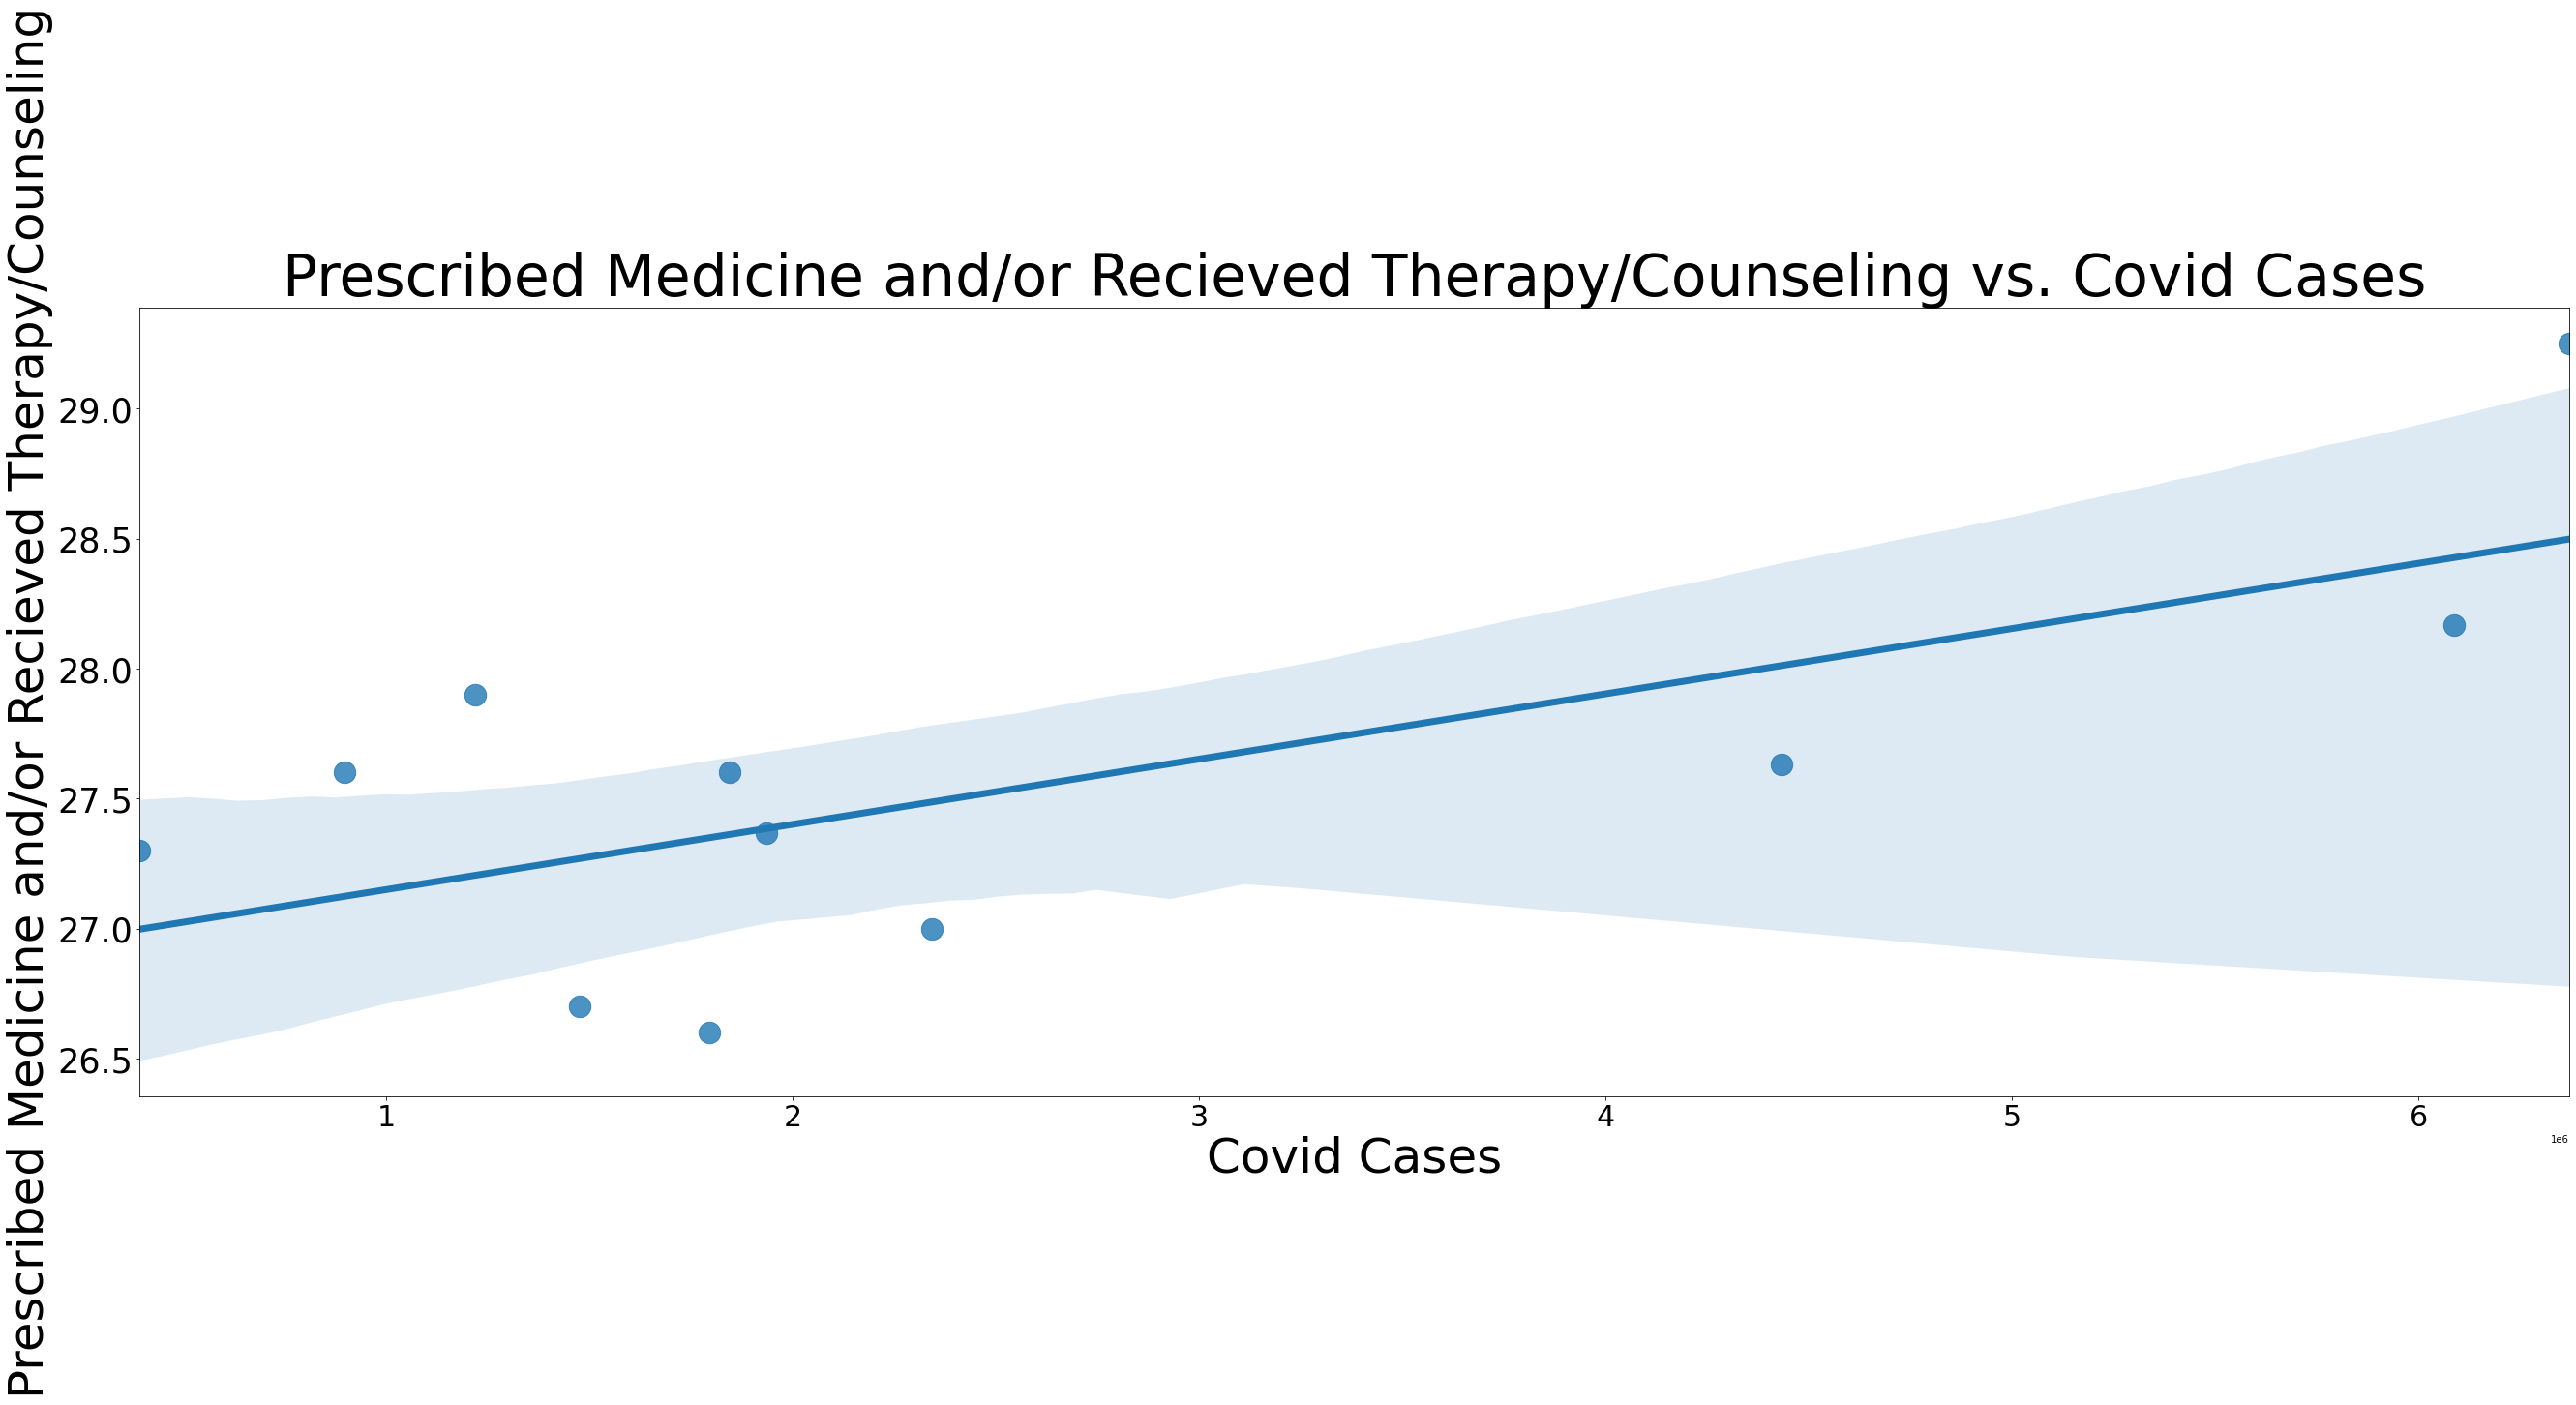

In [81]:
cases_depMajMin = covid_cases.join(depMajMin_dataset['Percentage'])

plt.figure(figsize = (45,15))
sns.regplot(x='Cases', y = 'Percentage', data = cases_depMajMin, scatter_kws = {'s' : 500}, line_kws={'linewidth':7})
plt.title('Prescribed Medicine and/or Recieved Therapy/Counseling vs. Covid Cases', size = 60)
plt.xlabel('Covid Cases', size = 50)
plt.ylabel('Prescribed Medicine and/or Recieved Therapy/Counseling', size = 50)
plt.xticks(size = 30)
plt.yticks(size = 35)
plt.show

We created a scatter plot to check for relationships between the number of new covid 
cases and our depressive disorder variables. All the plot follow a similar pattern of having a 
positive but flat regression line, which usually signifies that there is little or no relationship
between the two variables being plotted. 

However to fully analyze the relationships of the scatter plots more work would have to be done.
So, we will start analyzing the data by using the sm.OLS method to see if there is a relationship 
between new covid cases and mental illnesses.

---
# Data Analysis

In [82]:
outcome_1, predictors_1 = patsy.dmatrices('Percentage ~ Cases', cases_depMin)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit() 
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Percentage   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     1.982
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.193
Time:                        23:39:27   Log-Likelihood:                -8.6774
No. Observations:                  11   AIC:                             21.35
Df Residuals:                       9   BIC:                             22.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.0879      0.296     71.262      0.0

In [83]:
outcome_2, predictors_2 = patsy.dmatrices('Percentage ~ Cases', cases_depMaj1)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit() 
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Percentage   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.043
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.334
Time:                        23:39:27   Log-Likelihood:                -12.791
No. Observations:                  11   AIC:                             29.58
Df Residuals:                       9   BIC:                             30.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.7592      0.430     36.639      0.0

In [84]:
outcome_3, predictors_3 = patsy.dmatrices('Percentage ~ Cases', cases_depMaj2)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit() 
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Percentage   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                    0.5967
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.460
Time:                        23:39:27   Log-Likelihood:                -12.080
No. Observations:                  11   AIC:                             28.16
Df Residuals:                       9   BIC:                             28.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3690      0.403     48.038      0.0

In [85]:
outcome_4, predictors_4 = patsy.dmatrices('Percentage ~ Cases', cases_depMajMin)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit() 
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Percentage   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     8.717
Date:                Mon, 14 Mar 2022   Prob (F-statistic):             0.0162
Time:                        23:39:27   Log-Likelihood:                -7.9982
No. Observations:                  11   AIC:                             20.00
Df Residuals:                       9   BIC:                             20.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8989      0.278     96.689      0.0

Judging the p-values that are returned for our regression models, we see that 3 of our 4 models return a p-value > 0.05 or not considered statistically significant when drawing a correlation towards covid case rates. This implies that the # of covid cases may not be a statistically significant predictor of raises in major and minor depression rates individually in 18-29 year olds. 

Although our last regression model correlating our combination of major and minor depression rates does return a value of 0.016, a value that could be considered statistically significant (<0.05), our 3 other models representing our major and minor depression sets individually display that it is safe to assume that this correlation may not hold much signficance as the numbers may indicate. This is also supported through our regression plot for our 2 respective variables. 

Thus a conclusion that can be reached based from these results that covid cases are not a strong predictor in the rise of major and minor depression within young adults from the range of 18-29. 

---
# Ethics and Privacy

All of our datasets come from public datasets. The data on new Covid cases during the past recent years come from official government collected data. The data on mental illness measurements come from public data from reputable organizations with a clean history of obtaining their data ethically. All of the data from the government are reported data, removing any biases that may come from surveys. Data on Covid related topics was collected by the Centers for Disease Control and Prevention. Data collected on mental illnesses come from a mixture of self-reported data and more concrete reports from medical professionals. There may be bias in the self-reported data as these individuals reporting may either overestimate or underestimate their symptoms. Although the topic by nature is about an individual’s personal struggles, all the data collected was left anonymous, protecting the individuals from getting their personal information exposed and ensuring that the project is as ethically sound as possible.

---
# Conclusion and Discussion

At the beginning of this project, we were interested in mental health due to the prevalence of Covid 2 years ago. During the past two years, an innumberable amount of people were negatively impacted by the virus. This includes severe health issues, losing their loved ones, anxiety of potentially contracting covid, stress due to hardships caused by quarantine, etc... Due to  these burdens, we predicted that young adults(18-29) would experience a decline in mental health when covid case numbers rose. Thus, we compared the datasets we collected regarding clincial major and minor depression to observe whether or not months with high covid case numbers would correlate with months with high mental health care needs. 

Unfortunately, our dataset analysis did not support a significant correlation between the data sets we compared. Thus, we reject our hypothesis that there is a significant relationship between the rise of covid cases and rise of percentages of major and minor depression. While the changes in covid case numbers varied highly throughout the months of the 2 years, the statistics for mental health needs have remained relatively consistent. To prove the significant correlation between two datasets/variables, we would need a p-value less than 0.05; however, three of the four of the regression tables shows that our p-value is greater than 0.05. Therefore it would be safe to presume that covid cases and mental health do not carry statistical significance in correlation with one another, or that covid case rates are not a good predictor of rises in percentages in clinical major and minor depression.

# Limitations:

One of the limitations we experienced was the lack of datasets, available to the public for specific mental health symptoms. Many professional health-related datasets were private data that we could not access. Additionally, we sought datasets with similar time intervals between the years 2020 to 2022. Due to the short time frame of the covid outbreak in the US, it was difficult for us to find mental health data sets that aligned with the same time period. This is because covid restricted much in-person research, which led to either a halt in the studies or a progression towards online methods. Thus, many of the mental health-related datasets we found consisted of data prior to 2020. 
This problem also led to limitations in the number of data to analyze. A wider time frame would have allowed us to work with more data to provide more accurate and reliable variance and comparison between datasets. It would also allow us to utilize more datasets with flexible time intervals. However, because we have chosen a covid-related topic, we expected such limitations and proceeded to find and analyze datasets that accommodated them. 
	Lastly, a limitation we identified was the fact that most of our data for mental health were collected from self-reported surveys. This could have led to biased reports as self-reporting could have more subjective than objective data. In order to use more reliable sources and remove bias, it would have been more favorable to find data reported from professional mental health-related facilities. However, as mentioned above, due to covid-restrictions, the datasets available were mostly online self-reported surveys, limiting the amount of datasets to analyze. 

---
# Team Contributions

Our group collectively communicated throughout the process of our project, with certain portions having been collaborated on by multiple people, with certain portions having been done individually.

* Iris Choi: 
 * Data Analysis, Overview/Hypothesis, Dataset Observations, Video
    
* Sophia Kim:
 * Data Analysis, Conclusion & Discussion, Dataset Observations, Video
    
* Daniel Lee: 
 * Importing datasets, EDA Visualizations, Tidying data, Regression Model Analysis
    
* Eun Lee: 
 * EDA Visulizations(Figure & Graph Plotting), Data Analysis, Tidying Data
    
* Suebeen Noh: 
 * Data Analysis, Background & Prior Work, Ethics and Privacy, Video